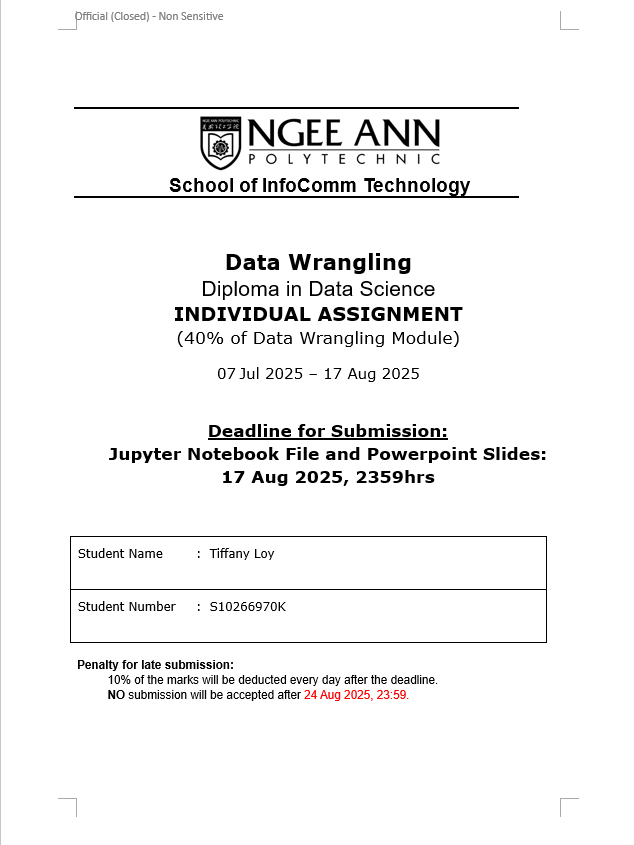

In [1]:
from IPython.display import Image, display 

# Display the cover image 
display(Image(filename = 'DW Cover Page Tiffany.png'))

In [2]:
# import required packages
# Core
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
import scipy.stats as stats
from scipy.stats import skew

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer

# Models
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

## 1. Problem Formulation

### 1.1 Load and Explore the Data

In [5]:
# loading the data 
# 1) Circuits
circuits = pd.read_csv("./f1db_csv_mod/circuits_mod.csv")
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [6]:
# 2) Constructor Results
constructor_results = pd.read_csv("./f1db_csv_mod/constructor_results_mod.csv")
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [7]:
# 3) Constructor Standings
constructor_standings = pd.read_csv("./f1db_csv_mod/constructor_standings_mod.csv")
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [8]:
# 4) Constructors
constructors = pd.read_csv("./f1db_csv_mod/constructors_mod.csv")
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [9]:
# 5) Driver Standings
driver_standings = pd.read_csv("./f1db_csv_mod/driver_standings_mod.csv")
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10,1,1,1
1,2,18,2,8,2,2,0
2,3,18,3,6,3,3,0
3,4,18,4,5,4,4,0
4,5,18,5,4,5,5,0


In [10]:
# 6) Drivers
drivers = pd.read_csv("./f1db_csv_mod/drivers_mod.csv")
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [11]:
# 7) Lap Times
lap_times = pd.read_csv("./f1db_csv_mod/lap_times_mod.csv")
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [12]:
# 8) Pit Stops
pit_stops = pd.read_csv("./f1db_csv_mod/pit_stops_mod.csv")
pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [13]:
# 9) Qualifying
qualifying = pd.read_csv("./f1db_csv_mod/qualifying_mod.csv")
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [14]:
# 10) Races
races = pd.read_csv("./f1db_csv_mod/races_mod.csv")
races.head()

,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [15]:
# 11) Results
results = pd.read_csv("./f1db_csv_mod/results_mod.csv")
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1


In [16]:
# 12) Seasons
seasons = pd.read_csv("./f1db_csv_mod/seasons_mod.csv")
seasons.head()

,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...


In [17]:
# 13) Status
status = pd.read_csv("./f1db_csv_mod/status_mod.csv")
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


### 1.2 Understand the Data

Before deciding on my problem, I first conducted an initial review of all 13 datasets provided. This broad analysis allowed me to understand the scope of available information, the relationships between tables, and the potential keys for merging.

I decided to use 'lap_times', 'pit_stops', 'qualifying', 'races', 'results' and 'status' where most of them can be joined on raceId and driverId except for 'status' which joins to 'results' on statusId and 'races' which joins to 'results' on raceId.

### 1.3 Formulate a Prediction Problem

By using the above datasets, I can form the following prediction problem. To predict the total race completion time for each driver for each Formula 1 race, accounting for potential delays and interruptions. This is a supervised regression problem where the target variable is the race completion time in milliseconds. The model will integrate features from five datasets:

lap_times: laptimes

pit_stops: stop number, time, duration

qualifying: laptimes in q1, q2 and q3

races: get the date of each race

results: fastest lap time, fastest lap speed, time (gap to winner)

status: race outcome indicators

The problem setup will ensure no target leakage by excluding any variables that directly reflect final race completion time or are only known after the race. The merged dataset will thus provide a feature-rich representation of pre-race and in-race conditions to train a model capable of forecasting realistic race completion times under varying conditions.

### 1.4 Further Exploration of Chosen Datasets

In [23]:
# Exploring lap_times data

# Preview of datset
print("\nPreview of dataset (Top 5 Rows):")
print(lap_times.head())

# Shape of data
print("\nShape of data:")
print(lap_times.shape)

# Data types
print("\nData Types:")
print(lap_times.info())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(lap_times.describe(include='all'))

# Categorical variable distributions
categorical_cols = lap_times.select_dtypes(include='object').columns.tolist()
print("\nProportion of Missing Values:")
print(lap_times[categorical_cols].isnull().mean().sort_values())

# Numerical variable distributions
numerical_cols = lap_times.select_dtypes(exclude='object').columns.tolist()
print("\nProportion of Missing Values:")
print(lap_times[numerical_cols].isnull().mean().sort_values())


Preview of dataset (Top 5 Rows):
   raceId  driverId  lap  position      time  milliseconds
0     841        20    1         1  1:38.109         98109
1     841        20    2         1  1:33.006         93006
2     841        20    3         1  1:32.713         92713
3     841        20    4         1  1:32.803         92803
4     841        20    5         1  1:32.342         92342

Shape of data:
(514592, 6)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514592 entries, 0 to 514591
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        514592 non-null  int64 
 1   driverId      514592 non-null  int64 
 2   lap           514592 non-null  int64 
 3   position      514592 non-null  int64 
 4   time          514592 non-null  object
 5   milliseconds  514592 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ MB
None

Descriptive Statistics:
               raceId       driverId


Preview of dataset (Top 5 Rows):
   raceId  driverId  stop  lap      time duration  milliseconds
0     841       153     1    1  17:05:23   26.898         26898
1     841        30     1    1  17:05:52   25.021         25021
2     841        17     1   11  17:20:48   23.426         23426
3     841         4     1   12  17:22:34   23.251         23251
4     841        13     1   13  17:24:10   23.842         23842

Shape of data:
(8828, 7)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8828 entries, 0 to 8827
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        8828 non-null   int64 
 1   driverId      8828 non-null   int64 
 2   stop          8828 non-null   int64 
 3   lap           8828 non-null   int64 
 4   time          8828 non-null   object
 5   duration      8828 non-null   object
 6   milliseconds  8828 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 482.9+ KB
None

D

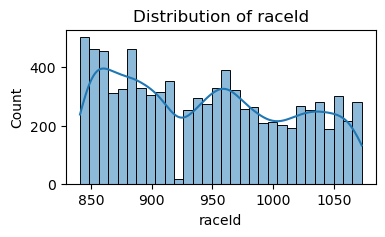

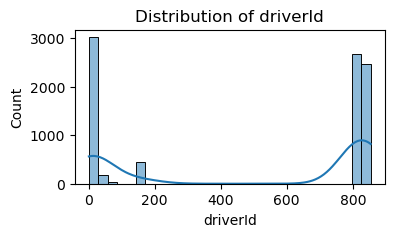

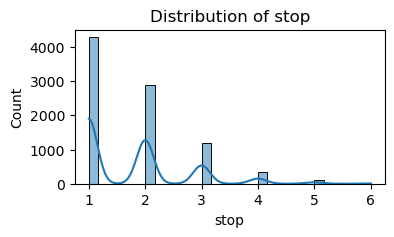

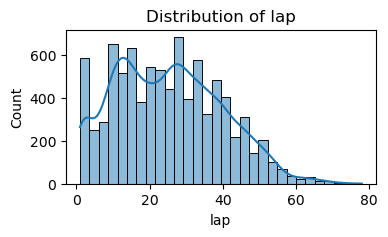

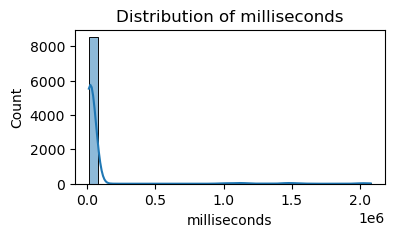

In [24]:
# Exploring pit_stops data

# Preview of datset
print("\nPreview of dataset (Top 5 Rows):")
print(pit_stops.head())

# Shape of data
print("\nShape of data:")
print(pit_stops.shape)

# Data types
print("\nData Types:")
print(pit_stops.info())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(pit_stops.describe(include='all'))

# Categorical variable distributions
categorical_cols = pit_stops.select_dtypes(include='object').columns.tolist()
print("\nProportion of Missing Values:")
print(pit_stops[categorical_cols].isnull().mean().sort_values())

# Numerical variable distributions
numerical_cols = pit_stops.select_dtypes(exclude='object').columns.tolist()
print("\nProportion of Missing Values:")
print(pit_stops[numerical_cols].isnull().mean().sort_values())

for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    sns.histplot(pit_stops[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [25]:
# Exploring qualifying data

# Preview of datset
print("\nPreview of dataset (Top 5 Rows):")
print(qualifying.head())

# Shape of data
print("\nShape of data:")
print(qualifying.shape)

# Data types
print("\nData Types:")
print(qualifying.info())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(qualifying.describe(include='all'))

# Categorical variable distributions
categorical_cols = qualifying.select_dtypes(include='object').columns.tolist()
print("\nProportion of Missing Values:")
print(qualifying[categorical_cols].isnull().mean().sort_values())

# Numerical variable distributions
numerical_cols = qualifying.select_dtypes(exclude='object').columns.tolist()
print("\nProportion of Missing Values:")
print(qualifying[numerical_cols].isnull().mean().sort_values())


Preview of dataset (Top 5 Rows):
   qualifyId  raceId  driverId  constructorId  number  position        q1  \
0          1      18         1              1      22         1  1:26.572   
1          2      18         9              2       4         2  1:26.103   
2          3      18         5              1      23         3  1:25.664   
3          4      18        13              6       2         4  1:25.994   
4          5      18         2              2       3         5  1:25.960   

         q2        q3  
0  1:25.187  1:26.714  
1  1:25.315  1:26.869  
2  1:25.452  1:27.079  
3  1:25.691  1:27.178  
4  1:25.518  1:27.236  

Shape of data:
(9135, 9)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9135 entries, 0 to 9134
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9135 non-null   int64 
 1   raceId         9135 non-null   int64 
 2   driverId       9135 non-null   int64 

In [26]:
# Exploring races data

# Preview of datset
print("\nPreview of dataset (Top 5 Rows):")
print(races.head())

# Shape of data
print("\nShape of data:")
print(races.shape)

# Data types
print("\nData Types:")
print(races.info())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(races.describe(include='all'))

# Categorical variable distributions
categorical_cols = races.select_dtypes(include='object').columns.tolist()
print("\nProportion of Missing Values:")
print(races[categorical_cols].isnull().mean().sort_values())

# Numerical variable distributions
numerical_cols = races.select_dtypes(exclude='object').columns.tolist()
print("\nProportion of Missing Values:")
print(races[numerical_cols].isnull().mean().sort_values())


Preview of dataset (Top 5 Rows):
   raceId  round  circuitId                   name       date      time  \
0       1      1          1  Australian Grand Prix  3/29/2009   6:00:00   
1       2      2          2   Malaysian Grand Prix  4/5/12009   9:00:00   
2       3      3         17     Chinese Grand Prix  4/19/2009   7:00:00   
3       4      4          3     Bahrain Grand Prix  4/26/2009  12:00:00   
4       5      5          4     Spanish Grand Prix  5/10/2009  12:00:00   

                                                 url  
0  http://en.wikipedia.org/wiki/2009_Australian_G...  
1  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4  http://en.wikipedia.org/wiki/2009_Spanish_Gran...  

Shape of data:
(1080, 7)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
-


Preview of dataset (Top 5 Rows):
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps     time milliseconds fastestLap  \
0            1              1    10.0    58  34:50.6      5690616         39   
1            2              2     8.0    58    5.478      5696094         41   
2            3              3     6.0    58    8.163      5698779         41   
3            4              4     5.0    58   17.181      5707797         58   
4            5              5     4.0    58   18.014      5708630         43   

  rank fastestLapTime fastestLapSpeed  statusId  
0    2        

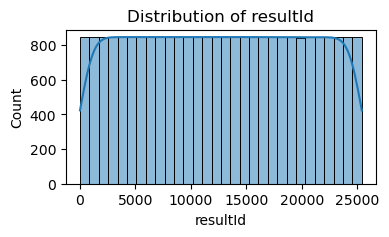

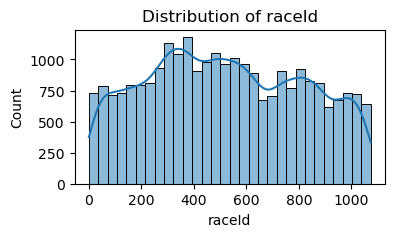

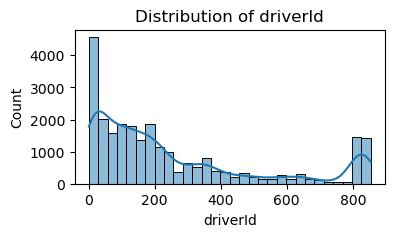

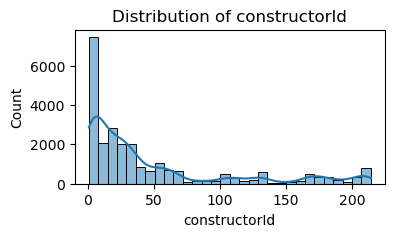

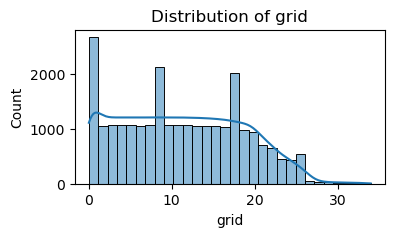

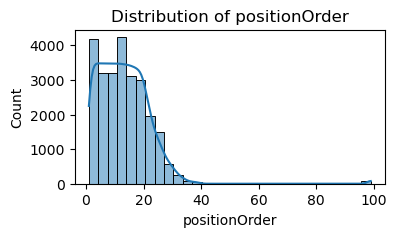

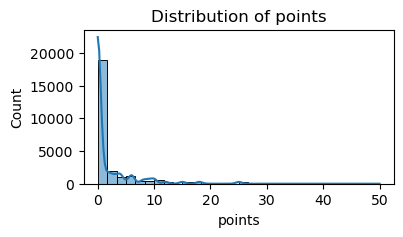

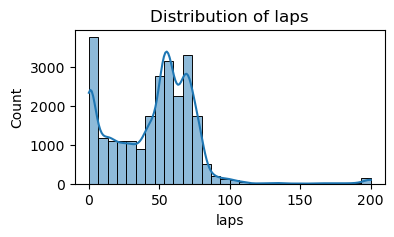

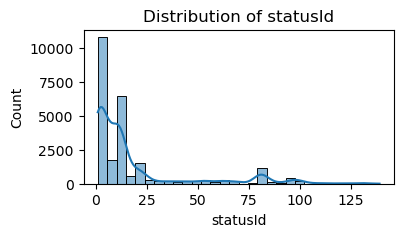

In [27]:
# Exploring results data

# Preview of datset
print("\nPreview of dataset (Top 5 Rows):")
print(results.head())

# Shape of data
print("\nShape of data:")
print(results.shape)

# Data types
print("\nData Types:")
print(results.info())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(results.describe(include='all'))

# Categorical variable distributions
categorical_cols = results.select_dtypes(include='object').columns.tolist()
print("\nProportion of Missing Values:")
print(results[categorical_cols].isnull().mean().sort_values())

# Numerical variable distributions
numerical_cols = results.select_dtypes(exclude='object').columns.tolist()
print("\nProportion of Missing Values:")
print(results[numerical_cols].isnull().mean().sort_values())

for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    sns.histplot(results[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [28]:
# Exploring status data

# Preview of datset
print("\nPreview of dataset (Top 5 Rows):")
print(status.head())

# Shape of data
print("\nShape of data:")
print(status.shape)

# Data types
print("\nData Types:")
print(status.info())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(status.describe(include='all'))

# Categorical variable distributions
categorical_cols = status.select_dtypes(include='object').columns.tolist()
print("\nProportion of Missing Values:")
print(status[categorical_cols].isnull().mean().sort_values())

# Numerical variable distributions
numerical_cols = status.select_dtypes(exclude='object').columns.tolist()
print("\nProportion of Missing Values:")
print(status[numerical_cols].isnull().mean().sort_values())


Preview of dataset (Top 5 Rows):
   statusId        status
0         1      Finished
1         2  Disqualified
2         3      Accident
3         4     Collision
4         5        Engine

Shape of data:
(137, 2)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  137 non-null    int64 
 1   status    137 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB
None

Descriptive Statistics:
          statusId    status
count   137.000000       137
unique         NaN       137
top            NaN  Finished
freq           NaN         1
mean     70.226277       NaN
std      40.519602       NaN
min       1.000000       NaN
25%      35.000000       NaN
50%      71.000000       NaN
75%     105.000000       NaN
max     139.000000       NaN

Proportion of Missing Values:
status    0.0
dtype: float64

Proportion of Missing Value

## 2. Data Wrangling on Multiple Tables

### 2.1 Grouping, Subsetting and Aggregating the Tables

In [31]:
# Grouping of lap_times while aggregating
lap_agg = (lap_times.groupby(['raceId', 'driverId'], as_index=False).agg(
        laps_recorded=('lap', 'max'),             
        lap_ms_mean=('milliseconds', 'mean'),
        lap_ms_std=('milliseconds', 'std'),
        lap_ms_min=('milliseconds', 'min'),
        lap_ms_max=('milliseconds', 'max')))
lap_agg.head()

,raceId,driverId,laps_recorded,lap_ms_mean,lap_ms_std,lap_ms_min,lap_ms_max
0,1,1,58,97563.758621,16066.158258,89020,153309
1,1,2,58,97635.672414,14275.663645,88283,157754
2,1,3,58,97612.172414,16311.606142,87706,155699
3,1,4,58,97597.637931,16337.006698,88712,153045
4,1,6,17,91822.235294,3476.084499,89923,104899


In [32]:
# Grouping of pit_stops while aggregating
pit_agg = (pit_stops.groupby(['raceId', 'driverId'], as_index=False).agg(
        pit_stops_count=('stop', 'count'),
        pit_ms_total=('milliseconds', 'sum'),
        pit_ms_avg=('milliseconds', 'mean'),
        first_pit_lap=('lap', 'min'),
        last_pit_lap=('lap', 'max')))
pit_agg.head()

,raceId,driverId,pit_stops_count,pit_ms_total,pit_ms_avg,first_pit_lap,last_pit_lap
0,841,1,2,46426,23213.0,16,36
1,841,2,2,48092,24046.0,15,30
2,841,3,1,23716,23716.0,16,16
3,841,4,3,72165,24055.0,12,42
4,841,5,1,24865,24865.0,17,17


In [33]:
# Subsetting qualifying to ensure no overlaps with results
qualifying_clean = (qualifying.rename(columns={'position': 'quali_position'})
                    .loc[:, ['raceId', 'driverId', 'quali_position', 'q1', 'q2', 'q3']])
qualifying_clean.head()

,raceId,driverId,quali_position,q1,q2,q3
0,18,1,1,1:26.572,1:25.187,1:26.714
1,18,9,2,1:26.103,1:25.315,1:26.869
2,18,5,3,1:25.664,1:25.452,1:27.079
3,18,13,4,1:25.994,1:25.691,1:27.178
4,18,2,5,1:25.960,1:25.518,1:27.236


### 2.2 Merging Tables

In [35]:
# Merge results with lap_times aggregate
results_w_laps = pd.merge(results, lap_agg, on=['raceId', 'driverId'], how='left')
results_w_laps.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,laps_recorded,lap_ms_mean,lap_ms_std,lap_ms_min,lap_ms_max
0,1,18,1,1,22,1,1,1,1,10.0,...,39,2,01:27.5,218.3,1,58.0,98114.068966,20990.356845,87452.0,166432.0
1,2,18,2,2,3,5,2,2,2,8.0,...,41,3,01:27.7,217.586,1,58.0,98208.517241,20212.298423,87739.0,166678.0
2,3,18,3,3,7,7,3,3,3,6.0,...,41,5,01:28.1,216.719,1,58.0,98254.810345,18957.199698,88090.0,156683.0
3,4,18,4,4,5,11,4,4,4,5.0,...,58,7,01:28.6,215.464,1,58.0,98410.293103,19640.823974,88603.0,170306.0
4,5,18,5,1,23,3,5,5,5,4.0,...,43,1,01:27.4,218.385,1,58.0,98424.655172,21826.401776,87418.0,175160.0


In [36]:
# Merge with pit_stops aggregate
results_w_laps_pits = pd.merge(results_w_laps, pit_agg, on=['raceId', 'driverId'], how='left')
results_w_laps_pits.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,laps_recorded,lap_ms_mean,lap_ms_std,lap_ms_min,lap_ms_max,pit_stops_count,pit_ms_total,pit_ms_avg,first_pit_lap,last_pit_lap
0,1,18,1,1,22,1,1,1,1,10.0,...,58.0,98114.068966,20990.356845,87452.0,166432.0,NaN,NaN,NaN,NaN,NaN
1,2,18,2,2,3,5,2,2,2,8.0,...,58.0,98208.517241,20212.298423,87739.0,166678.0,NaN,NaN,NaN,NaN,NaN
2,3,18,3,3,7,7,3,3,3,6.0,...,58.0,98254.810345,18957.199698,88090.0,156683.0,NaN,NaN,NaN,NaN,NaN
3,4,18,4,4,5,11,4,4,4,5.0,...,58.0,98410.293103,19640.823974,88603.0,170306.0,NaN,NaN,NaN,NaN,NaN
4,5,18,5,1,23,3,5,5,5,4.0,...,58.0,98424.655172,21826.401776,87418.0,175160.0,NaN,NaN,NaN,NaN,NaN


In [37]:
# Merge with qualifying
results_w_laps_pits_qual = pd.merge(results_w_laps_pits, qualifying_clean, on=['raceId', 'driverId'], how='left')
results_w_laps_pits_qual.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,lap_ms_max,pit_stops_count,pit_ms_total,pit_ms_avg,first_pit_lap,last_pit_lap,quali_position,q1,q2,q3
0,1,18,1,1,22,1,1,1,1,10.0,...,166432.0,NaN,NaN,NaN,NaN,NaN,1.0,1:26.572,1:25.187,1:26.714
1,2,18,2,2,3,5,2,2,2,8.0,...,166678.0,NaN,NaN,NaN,NaN,NaN,5.0,1:25.960,1:25.518,1:27.236
2,3,18,3,3,7,7,3,3,3,6.0,...,156683.0,NaN,NaN,NaN,NaN,NaN,7.0,1:26.295,1:26.059,1:28.687
3,4,18,4,4,5,11,4,4,4,5.0,...,170306.0,NaN,NaN,NaN,NaN,NaN,12.0,1:26.907,1:26.188,\N
4,5,18,5,1,23,3,5,5,5,4.0,...,175160.0,NaN,NaN,NaN,NaN,NaN,3.0,1:25.664,1:25.452,1:27.079


In [38]:
# Merge with races
race_results_w_laps_pits_qual = pd.merge(results_w_laps_pits_qual, races, on='raceId', how='left')
race_results_w_laps_pits_qual.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,quali_position,q1,q2,q3,round,circuitId,name,date,time_y,url
0,1,18,1,1,22,1,1,1,1,10.0,...,1.0,1:26.572,1:25.187,1:26.714,1,1,Australian Grand Prix,3/16/2008,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
1,2,18,2,2,3,5,2,2,2,8.0,...,5.0,1:25.960,1:25.518,1:27.236,1,1,Australian Grand Prix,3/16/2008,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
2,3,18,3,3,7,7,3,3,3,6.0,...,7.0,1:26.295,1:26.059,1:28.687,1,1,Australian Grand Prix,3/16/2008,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
3,4,18,4,4,5,11,4,4,4,5.0,...,12.0,1:26.907,1:26.188,\N,1,1,Australian Grand Prix,3/16/2008,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
4,5,18,5,1,23,3,5,5,5,4.0,...,3.0,1:25.664,1:25.452,1:27.079,1,1,Australian Grand Prix,3/16/2008,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...


In [39]:
# Merge with status table
final_df = pd.merge(race_results_w_laps_pits_qual, status, on='statusId', how='left')
final_df = final_df.copy()
final_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,q1,q2,q3,round,circuitId,name,date,time_y,url,status
0,1,18,1,1,22,1,1,1,1,10.0,...,1:26.572,1:25.187,1:26.714,1,1,Australian Grand Prix,3/16/2008,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,Finished
1,2,18,2,2,3,5,2,2,2,8.0,...,1:25.960,1:25.518,1:27.236,1,1,Australian Grand Prix,3/16/2008,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,Finished
2,3,18,3,3,7,7,3,3,3,6.0,...,1:26.295,1:26.059,1:28.687,1,1,Australian Grand Prix,3/16/2008,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,Finished
3,4,18,4,4,5,11,4,4,4,5.0,...,1:26.907,1:26.188,\N,1,1,Australian Grand Prix,3/16/2008,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,Finished
4,5,18,5,1,23,3,5,5,5,4.0,...,1:25.664,1:25.452,1:27.079,1,1,Australian Grand Prix,3/16/2008,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,Finished


In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  object 
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  object 
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time_x           25399 non-null  object 
 12  milliseconds     25399 non-null  object 
 13  fastestLap       25399 non-null  object 
 14  rank             25399 non-null  object 
 15  fastestLapTime   25399 non-null  object 
 16  fastestLapSpeed  25399 non-null  object 
 17  statusId    

In [41]:
# renaming the columns so that it is easier to understand
new_column_names = {
    'grid': 'starting_grid',
    'position': 'finishing_position',
    'laps': 'completed_laps',
    'time_x': 'race_time',
    'milliseconds': 'race_time_ms',
    'time_y': 'start_time'
}

final_df.rename(columns = new_column_names, inplace = True)

### 2.3 Creating features with Transactional Data or Time Series Data

In [43]:
# Convert q1, q2 and q3 to milliseconds
def time_to_ms(x):
    # Keep nan as nan
    if pd.isna(x):                                            
        return np.nan
        
    # Normalize to string, trim spaces
    s = str(x).strip()
    
    # Treat common placeholders as missing
    if s.lower() in {'', 'na', 'n/a', 'null', '\\n'}:
        return np.nan
        
    # If format is M:SS.mmm, make it HH:MM:SS.mmm
    if s.count(':') == 1:
        s = '00:' + s
    # Make it into a timedelta
    td = pd.to_timedelta(s, errors='coerce')

    # Return in milliseconds
    return np.nan if pd.isna(td) else td.total_seconds() * 1000

for col in ['q1', 'q2', 'q3', 'fastestLapTime']:
    if col in final_df.columns:
        final_df[col + "_ms"] = final_df[col].apply(time_to_ms)

In [44]:
# Create qualifying average and qualifying range features
q_ms_cols = [c for c in ['q1_ms', 'q2_ms', 'q3_ms'] if c in final_df.columns]
if len(q_ms_cols) > 0:
    final_df['quali_avg_ms'] = final_df[q_ms_cols].mean(axis=1, skipna=True)
    final_df['quali_range_ms'] = final_df[q_ms_cols].max(axis=1, skipna=True) - final_df[q_ms_cols].min(axis=1, skipna=True)

In [45]:
# Convert fastestLapSpeed to km/ms
num_cols = ['race_time_ms', 'fastestLapSpeed', 'lap_ms_mean', 'laps_recorded', 'finishing_position']
for c in num_cols:
    if c in final_df.columns:
        final_df[c] = pd.to_numeric(final_df[c], errors='coerce')

final_df['fastestLapSpeed_ms'] = final_df['fastestLapSpeed'] / 3_600_000.0

### 2.4 Applying Mathematical Calculations to Features

In [47]:
# Winner per race
winners = (
    final_df
    .loc[final_df['finishing_position'] == 1, ['raceId','driverId','laps_recorded','lap_ms_mean','fastestLapSpeed_ms','race_time_ms']]
    .sort_values(['raceId','race_time_ms'])  # just in case of ties, keep the shortest time
    .drop_duplicates(subset='raceId', keep='first')
    .copy()
)

# Track length
winners['lap_length_km_est'] = winners['lap_ms_mean'] * winners['fastestLapSpeed_ms']

final_df = final_df.merge(
    winners[['raceId','lap_length_km_est']],
    on='raceId', how='left'
)

In [48]:
# Lap-time based 
final_df['lap_best_gap']  = final_df['lap_ms_min'] - final_df['lap_ms_mean']
final_df['lap_worst_gap'] = final_df['lap_ms_max'] - final_df['lap_ms_mean']

In [49]:
# Checking if there was red flag/ yellow flag during the race using status
red = {
    'damage', 'collision damage', 'fatal accident', 'fire', 'engine fire', 'heat shield fire',
    'collision', 'accident'

}
yellow = {
    'debris', 'brake duct', 'ers', 'power unit', 'supercharger', 'magneto', 'water pipe', 'oil pipe',
    'axle', 'fuel pipe', 'spark plugs', 'water pump', 'cv joint', 'turbo', 'distributor', 'injection',
    'fuel leak', 'oil pump', 'safety belt', 'alternator', 'not restarted', 'crankshaft', 'halfshaft',
    'stalled', 'battery', 'chassis', 'ignition', 'drivetrain', 'vibrations', 'power loss',
    'fuel', 'launch control', 'fuel rig', 'oil line', 'fuel system', 'physical', 'wheel bearing', 
    'rear wing', 'handling', 'pneumatics', 'wheel nut', 'out of fuel', 'tyre puncture', 'engine misfire',
    'oil pressure', 'track rod', 'fuel pump', 'water leak', 'wheel rim', 'oil leak', 'exhaust',
    'broken wing', 'electronics', 'steering', 'throttle', 'wheel', 'refuelling', 'water pressure',
    'front wing', 'fuel pressure', 'driveshaft', 'puncture', 'driver seat', 'tyre', 'mechanical', 
    'overheating', 'differential', 'brakes', 'suspension', 'radiator', 'spun off', 'electrical',
    'hydraulics', 'clutch', 'transmission', 'gearbox', 'engine'
}

def map_flag(status_text: str) -> str:
    s = ('' if pd.isna(status_text) else str(status_text)).strip().lower()
    # ignore obvious non-incident statuses
    if not s or s.startswith('+') or s in {
        'illness', 'seat', 'eye injury', 'driver unwell', 'did not prequalify', 'excluded', 'underweight',
        'safety concerns', 'did not qualify', 'safety', '107% rule', 'injury', 'injured', 'not classified',
        'withdrew', 'technical', 'retired', 'disqualified', 'finished'
    }:
        return 'none'
        
    # priority: red > yellow
    if any(k in s for k in red):
        return 'red'
    if any(k in s for k in yellow):
        return 'yellow'
    return 'none'

# Apply to your dataframe
final_df['flag_condition'] = final_df['status'].apply(map_flag)

print(final_df['flag_condition'].value_counts(dropna=False))

flag_condition
none      16065
yellow     7413
red        1921
Name: count, dtype: int64


### 2.5 Extracting Features from Unstructed Data

In [51]:
final_df['date'] = pd.to_datetime(final_df['date'], errors='coerce')
final_df['year'] = final_df['date'].dt.year
final_df['year'].fillna(final_df['year'].shift(-1)).astype('Int64')

0        2008
1        2008
2        2008
3        2008
4        2008
         ... 
25394    2021
25395    2021
25396    2021
25397    2021
25398    2021
Name: year, Length: 25399, dtype: Int64

In [52]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   resultId            25399 non-null  int64         
 1   raceId              25399 non-null  int64         
 2   driverId            25399 non-null  int64         
 3   constructorId       25399 non-null  int64         
 4   number              25399 non-null  object        
 5   starting_grid       25399 non-null  int64         
 6   finishing_position  14613 non-null  float64       
 7   positionText        25399 non-null  object        
 8   positionOrder       25399 non-null  int64         
 9   points              25399 non-null  float64       
 10  completed_laps      25399 non-null  int64         
 11  race_time           25399 non-null  object        
 12  race_time_ms        6808 non-null   float64       
 13  fastestLap          25399 non-null  object    

## 3. Data Cleansing and Transformation

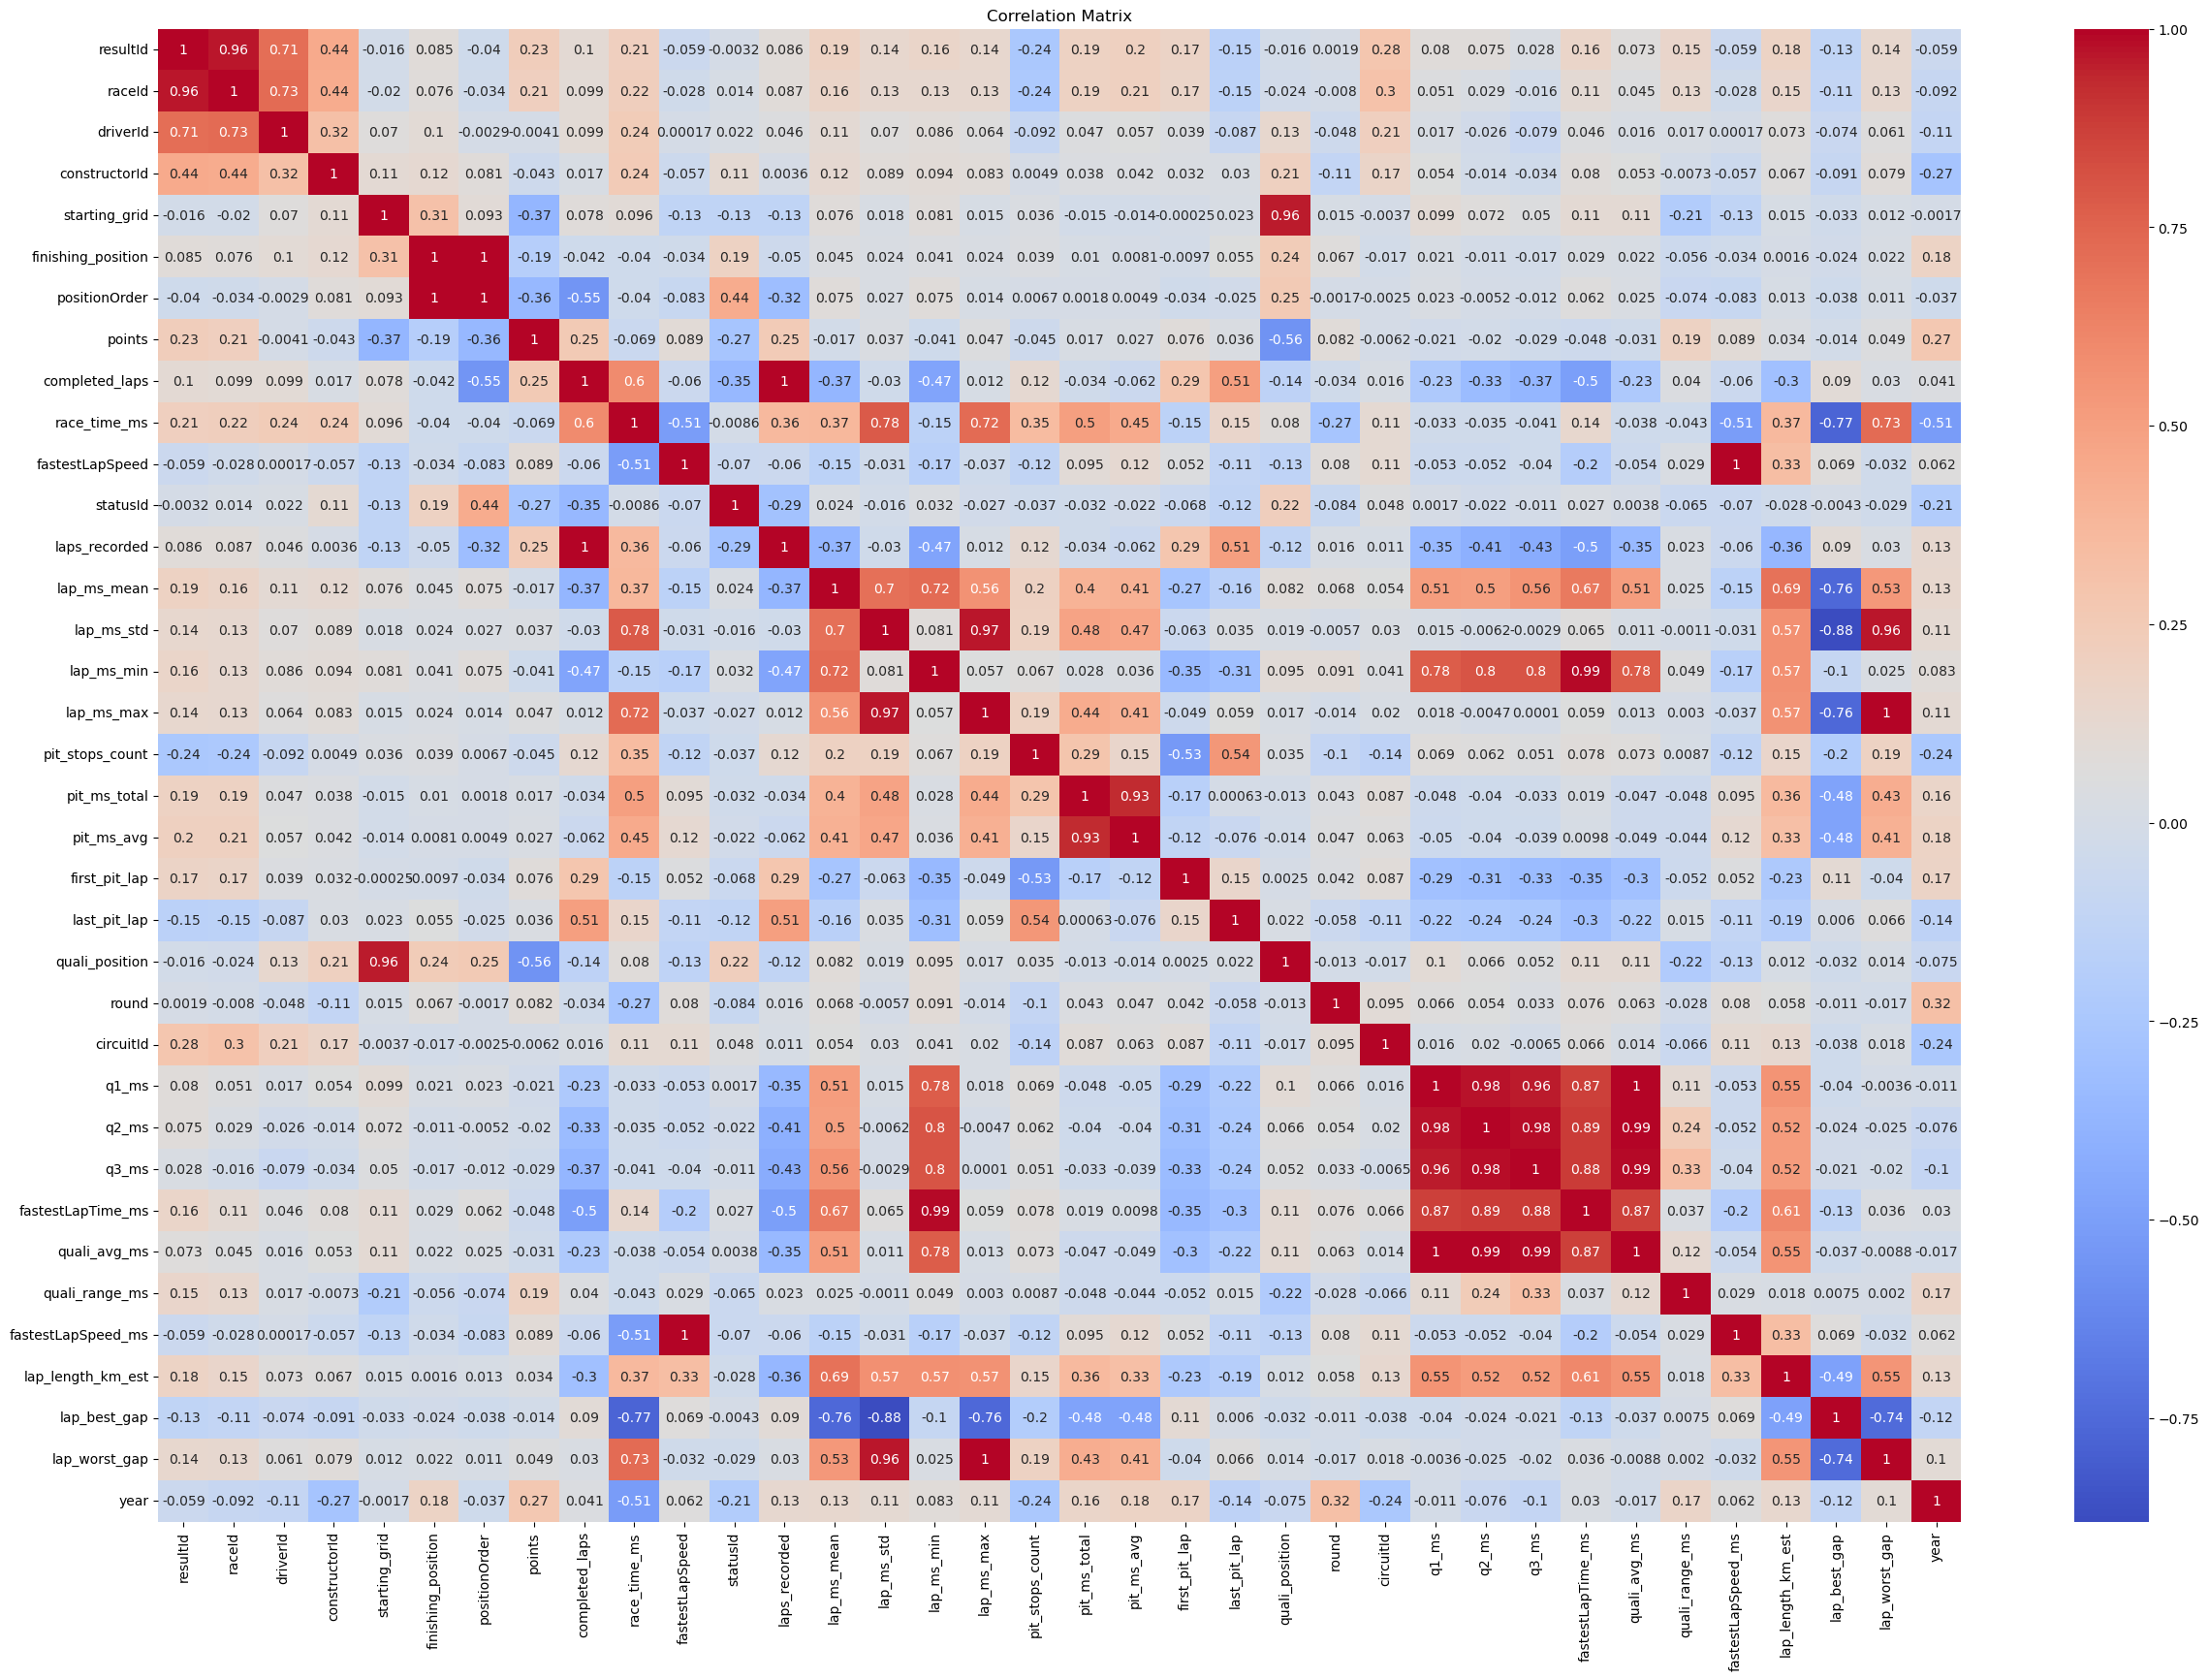

In [54]:
# Heatmap for initial correlations
plt.figure(figsize=(30,20))
sns.heatmap(final_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### 3.1 Shifting Data Leakage Features

In [56]:
shift_cols = ['race_time_ms', 'rank', 'fastestLapTime_ms', 'fastestLapSpeed_ms', 'laps_recorded', 'pit_stops_count', 
              'pit_ms_total', 'first_pit_lap', 'lap_best_gap', 'lap_worst_gap', 'flag_condition']

# shifting 
final_df = final_df.sort_values(['driverId', 'circuitId', 'year']).copy()

for col in shift_cols:
    # Create the shifted column
    shifted = final_df.groupby(['driverId', 'circuitId'], sort=False)[col].shift(1)

final_df.head()

,resultId,raceId,driverId,constructorId,number,starting_grid,finishing_position,positionText,positionOrder,points,...,q3_ms,fastestLapTime_ms,quali_avg_ms,quali_range_ms,fastestLapSpeed_ms,lap_length_km_est,lap_best_gap,lap_worst_gap,flag_condition,year
370,371,36,1,1,2,4,3.0,3,3,6.0,...,86755.0,86400.0,86335.333333,1178.0,0.000061,NaN,-2396.672414,19726.327586,none,2007.0
0,1,18,1,1,22,1,1.0,1,1,10.0,...,86714.0,87500.0,86157.666667,1527.0,0.000061,5.949528,-10662.068966,68317.931034,none,2008.0
7572,7573,1,1,1,1,18,NaN,D,20,0.0,...,NaN,89000.0,86454.000000,0.0,0.000060,5.874946,-8543.758621,55745.241379,none,2009.0
20349,20352,338,1,1,2,11,6.0,6,6,8.0,...,NaN,88500.0,85115.000000,138.0,0.000060,5.751134,-8846.224138,67067.775862,none,2010.0
20777,20780,841,1,1,3,2,2.0,2,2,18.0,...,84307.0,90300.0,84762.000000,1077.0,0.000059,5.465113,-2661.103448,20322.896552,none,2011.0


### 3.2 Dropping Unnecessary Features

In [58]:
identifiers_drop = ['resultId', 'raceId', 'driverId', 'constructorId', 'statusId']
unnecessary_drop = ['finishing_position', 'positionText', 'positionOrder', 'completed_laps', 'race_time', 'status', 'number', 'url', 
                    'name', 'date', 'points', 'rank', 'fastestLap', 'fastestLapTime', 'fastestLapSpeed', 'start_time', 
                    'round', 'q1', 'q2', 'q3', 'q1_ms', 'q2_ms', 'q3_ms', 'lap_ms_mean', 'lap_ms_min', 'last_pit_lap',
                    'lap_ms_max', 'lap_ms_std', 'pit_ms_avg']

drop_cols = identifiers_drop + unnecessary_drop
final_df = final_df.drop(drop_cols, axis = 1)


In [59]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25399 entries, 370 to 25355
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   starting_grid       25399 non-null  int64  
 1   race_time_ms        6808 non-null   float64
 2   laps_recorded       9717 non-null   float64
 3   pit_stops_count     4291 non-null   float64
 4   pit_ms_total        4291 non-null   float64
 5   first_pit_lap       4291 non-null   float64
 6   quali_position      9134 non-null   float64
 7   circuitId           25399 non-null  int64  
 8   fastestLapTime_ms   6952 non-null   float64
 9   quali_avg_ms        8991 non-null   float64
 10  quali_range_ms      8991 non-null   float64
 11  fastestLapSpeed_ms  6953 non-null   float64
 12  lap_length_km_est   5830 non-null   float64
 13  lap_best_gap        9717 non-null   float64
 14  lap_worst_gap       9717 non-null   float64
 15  flag_condition      25399 non-null  object 
 16  year   

### 3.3 Changing Datatype of Features

In [61]:
final_df['race_time_ms'] = final_df['race_time_ms'].apply(pd.to_numeric, errors = 'coerce')

final_df[['pit_stops_count', 'quali_position', 'year']] = final_df[['pit_stops_count', 'quali_position', 'year']].apply(pd.to_numeric, errors = 'coerce')

final_df[['pit_stops_count', 'quali_position', 'year']] = final_df[['pit_stops_count', 'quali_position', 'year']].astype('Int64')

final_df['circuitId'] = final_df['circuitId'].astype(object)

In [62]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25399 entries, 370 to 25355
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   starting_grid       25399 non-null  int64  
 1   race_time_ms        6808 non-null   float64
 2   laps_recorded       9717 non-null   float64
 3   pit_stops_count     4291 non-null   Int64  
 4   pit_ms_total        4291 non-null   float64
 5   first_pit_lap       4291 non-null   float64
 6   quali_position      9134 non-null   Int64  
 7   circuitId           25399 non-null  object 
 8   fastestLapTime_ms   6952 non-null   float64
 9   quali_avg_ms        8991 non-null   float64
 10  quali_range_ms      8991 non-null   float64
 11  fastestLapSpeed_ms  6953 non-null   float64
 12  lap_length_km_est   5830 non-null   float64
 13  lap_best_gap        9717 non-null   float64
 14  lap_worst_gap       9717 non-null   float64
 15  flag_condition      25399 non-null  object 
 16  year   

### 3.4 Dropping Duplicate Rows

In [64]:
# Drop the duplicates
final_df = final_df.drop_duplicates()

In [65]:
# Analysis after dropping
print('Number of missing data:')
print(final_df.isnull().sum())

print('\nNumber of duplicates:')
print(final_df.duplicated().sum())

Number of missing data:
starting_grid             0
race_time_ms          17275
laps_recorded         14343
pit_stops_count       19769
pit_ms_total          19769
first_pit_lap         19769
quali_position        14926
circuitId                 0
fastestLapTime_ms     17108
quali_avg_ms          15069
quali_range_ms        15069
fastestLapSpeed_ms    17107
lap_length_km_est     18230
lap_best_gap          14343
lap_worst_gap         14343
flag_condition            0
year                    410
dtype: int64

Number of duplicates:
0


### 3.5 Filling Arbitrary Values

In [67]:
arbitrary_fill = ['quali_avg_ms', 'quali_range_ms', 'quali_position']
final_df[arbitrary_fill] = final_df[arbitrary_fill].fillna(999)
aribitrary_fillpit = ['pit_stops_count', 'pit_ms_total', 'first_pit_lap']
final_df[aribitrary_fillpit] = final_df[aribitrary_fillpit].fillna(0)
final_df.head()

,starting_grid,race_time_ms,laps_recorded,pit_stops_count,pit_ms_total,first_pit_lap,quali_position,circuitId,fastestLapTime_ms,quali_avg_ms,quali_range_ms,fastestLapSpeed_ms,lap_length_km_est,lap_best_gap,lap_worst_gap,flag_condition,year
370,4,5147365.0,58.0,0,0.0,0.0,4,1,86400.0,86335.333333,1178.0,0.000061,NaN,-2396.672414,19726.327586,none,2007
0,1,5690616.0,58.0,0,0.0,0.0,1,1,87500.0,86157.666667,1527.0,0.000061,5.949528,-10662.068966,68317.931034,none,2008
7572,18,NaN,58.0,0,0.0,0.0,15,1,89000.0,86454.000000,0.0,0.000060,5.874946,-8543.758621,55745.241379,none,2009
20349,11,5646429.0,58.0,0,0.0,0.0,11,1,88500.0,85115.000000,138.0,0.000060,5.751134,-8846.224138,67067.775862,none,2010
20777,2,5392556.0,58.0,2,46426.0,16.0,2,1,90300.0,84762.000000,1077.0,0.000059,5.465113,-2661.103448,20322.896552,none,2011


In [68]:
# Checking after filling arbitrary
print('Number of missing data:')
print(final_df.isnull().sum())

Number of missing data:
starting_grid             0
race_time_ms          17275
laps_recorded         14343
pit_stops_count           0
pit_ms_total              0
first_pit_lap             0
quali_position            0
circuitId                 0
fastestLapTime_ms     17108
quali_avg_ms              0
quali_range_ms            0
fastestLapSpeed_ms    17107
lap_length_km_est     18230
lap_best_gap          14343
lap_worst_gap         14343
flag_condition            0
year                    410
dtype: int64


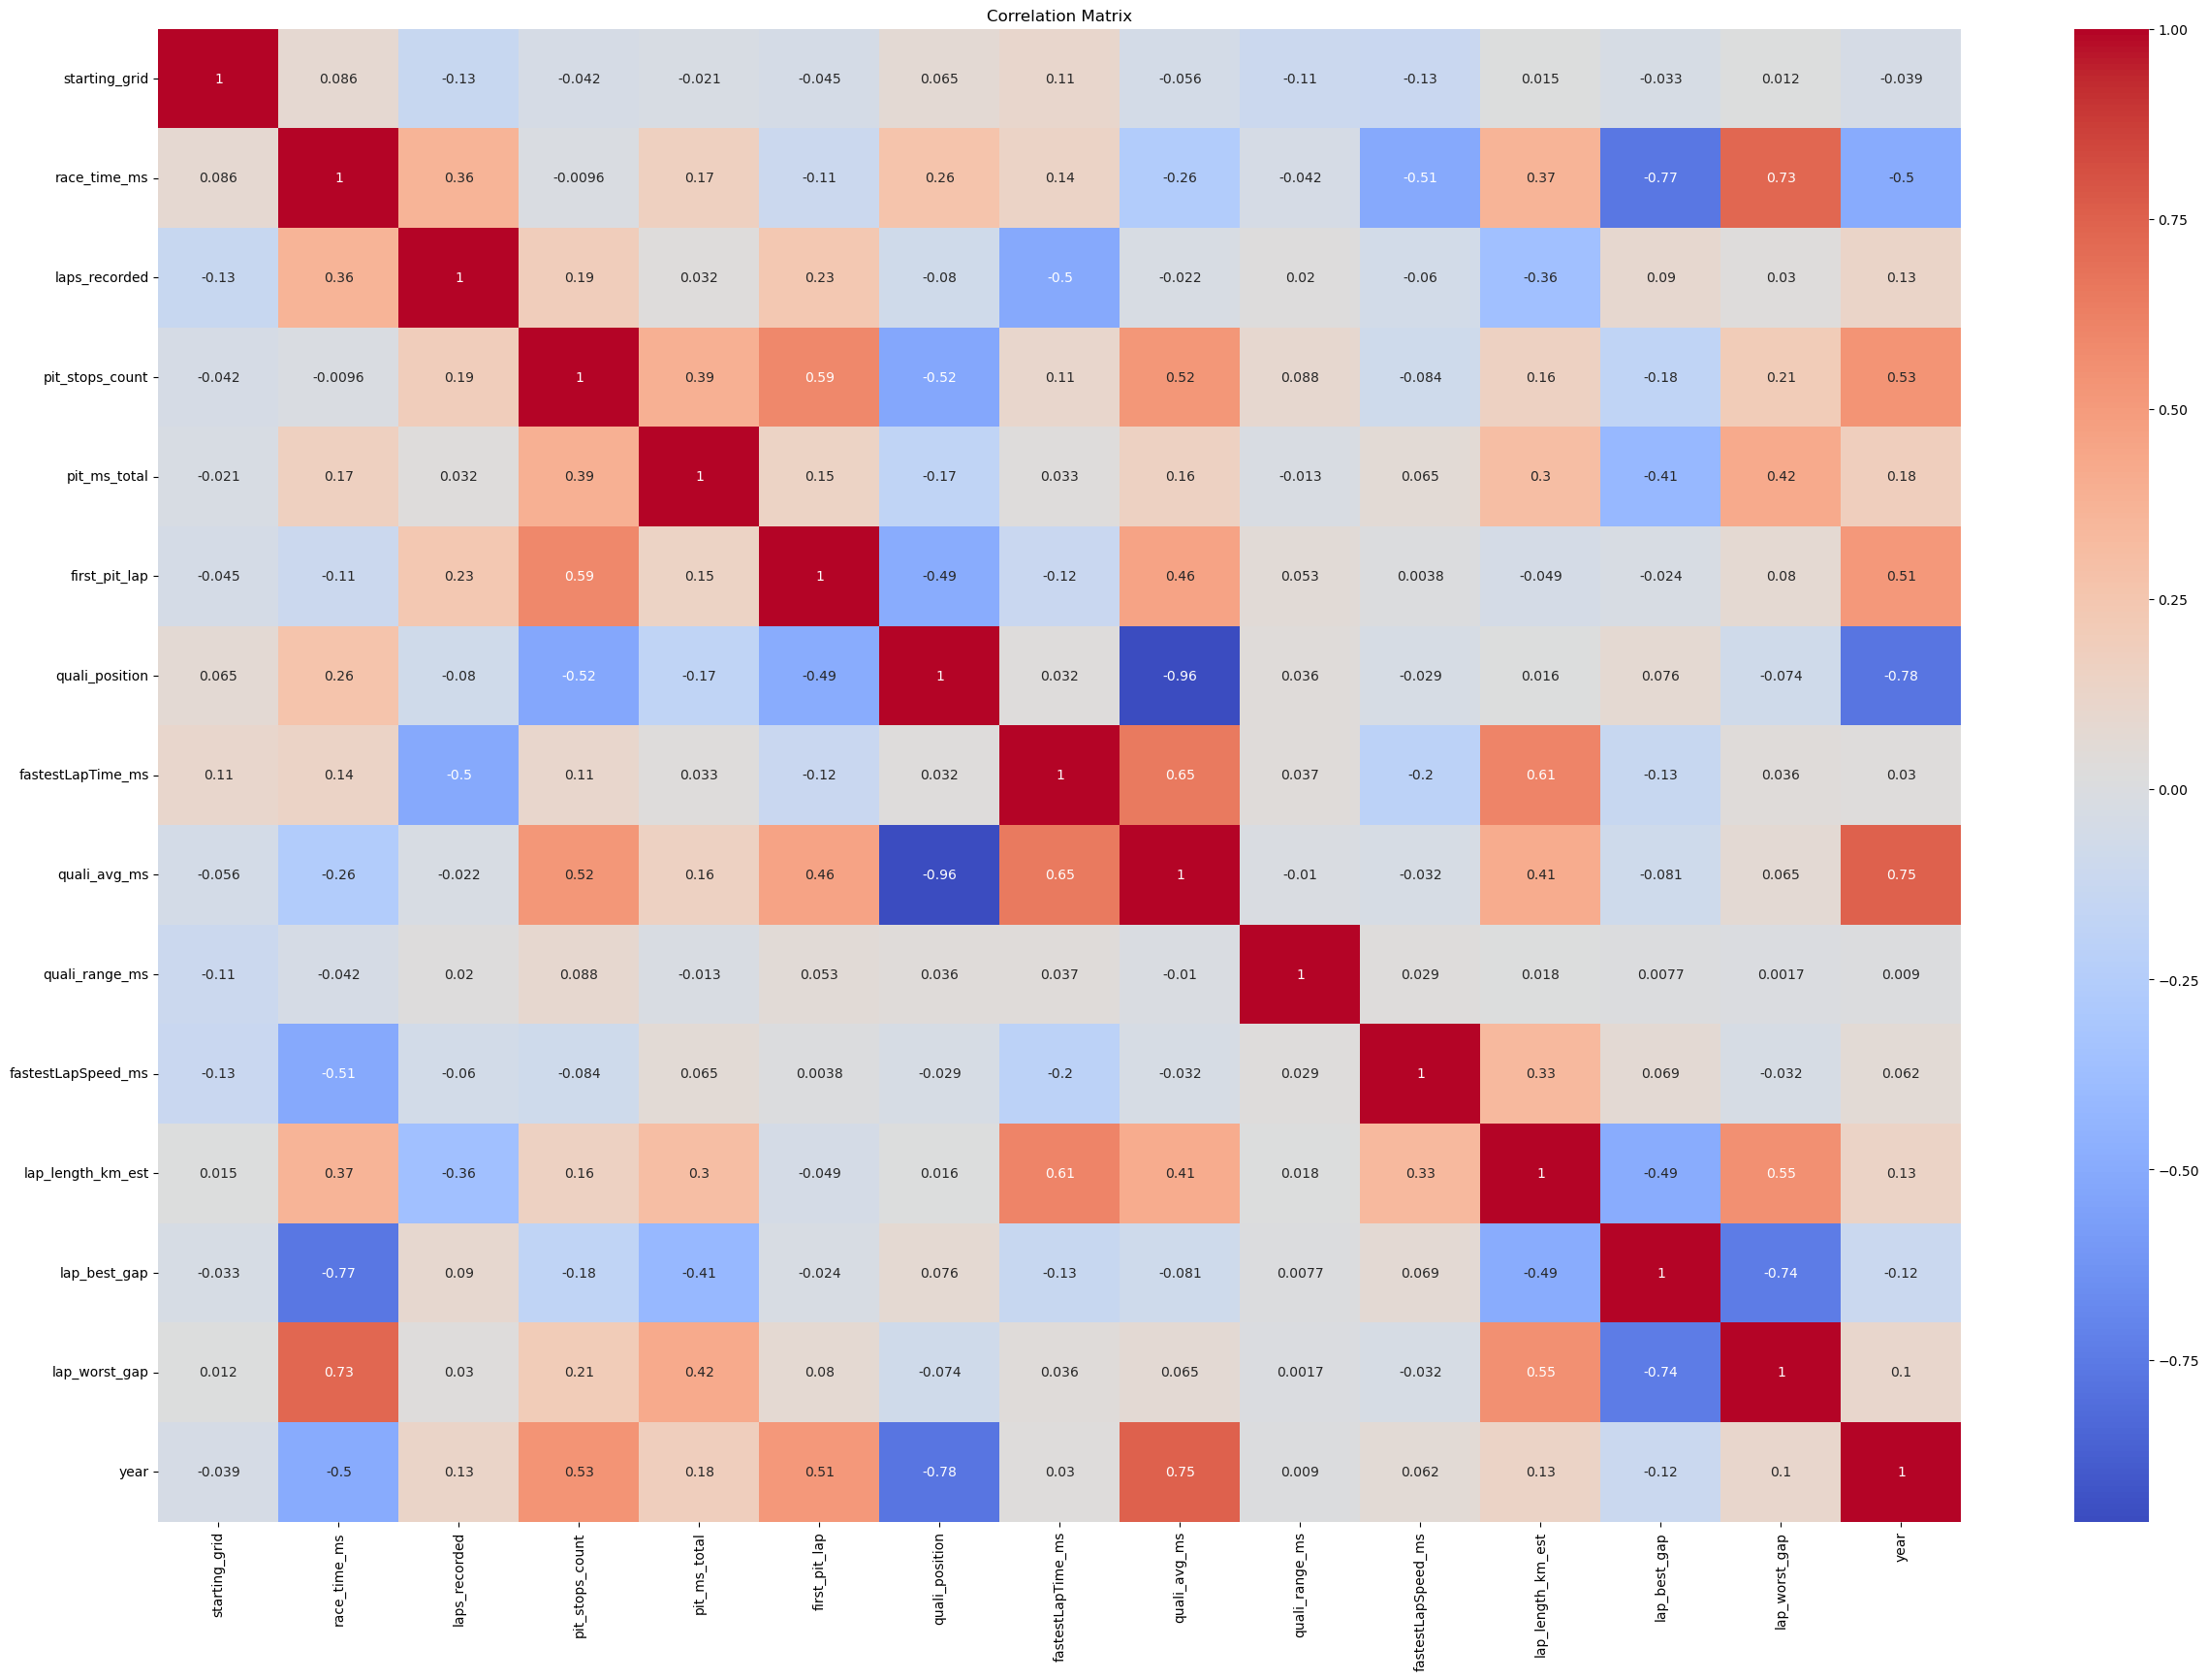

In [69]:
# Heatmap for final correlations
plt.figure(figsize=(30,20))
sns.heatmap(final_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

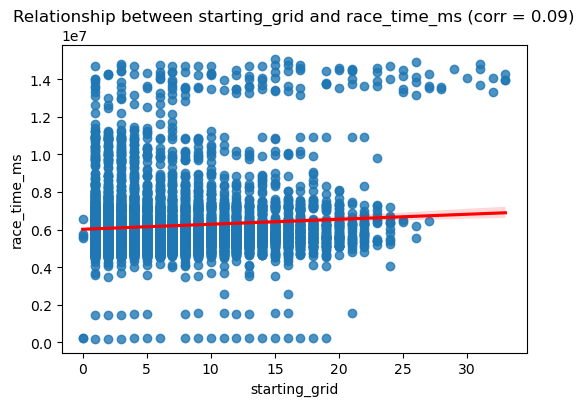

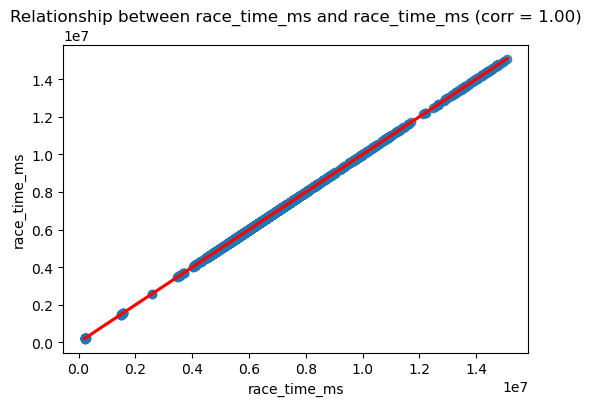

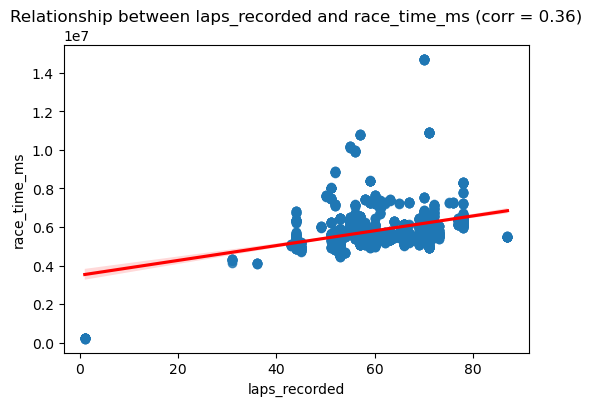

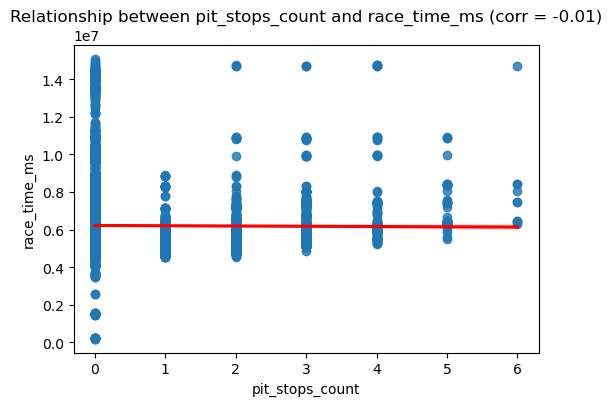

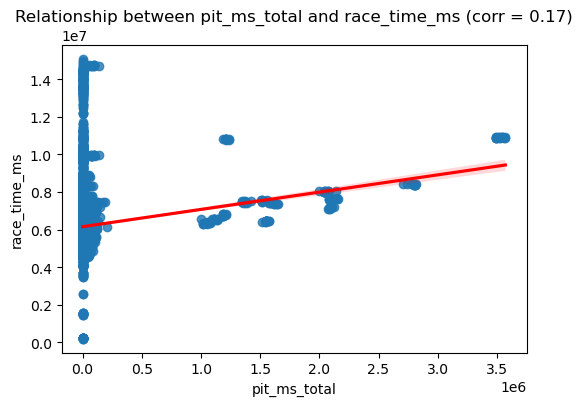

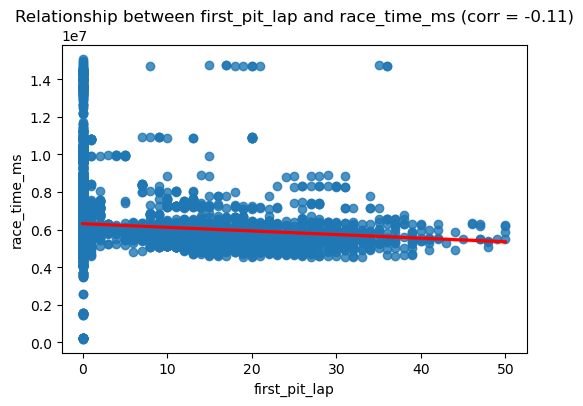

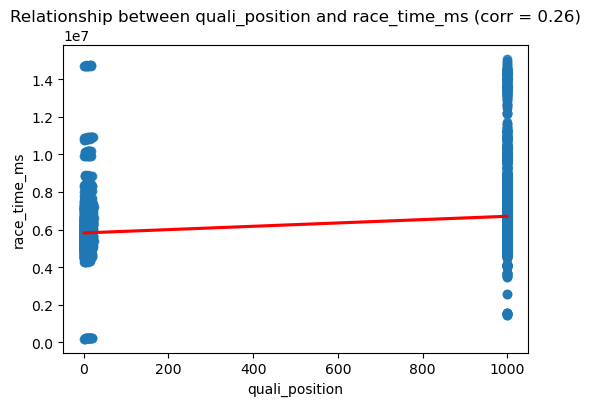

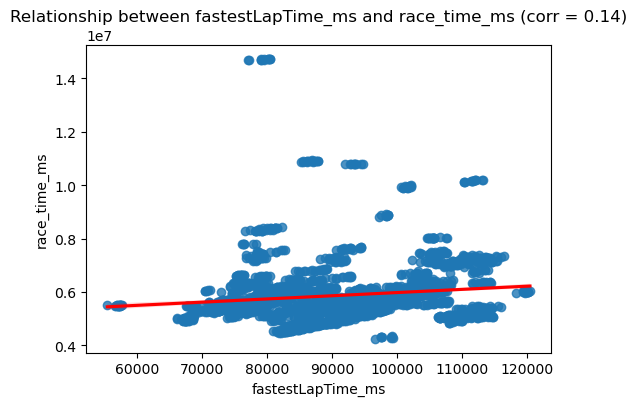

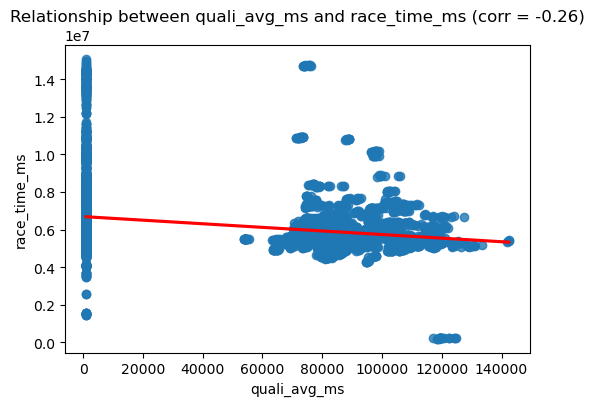

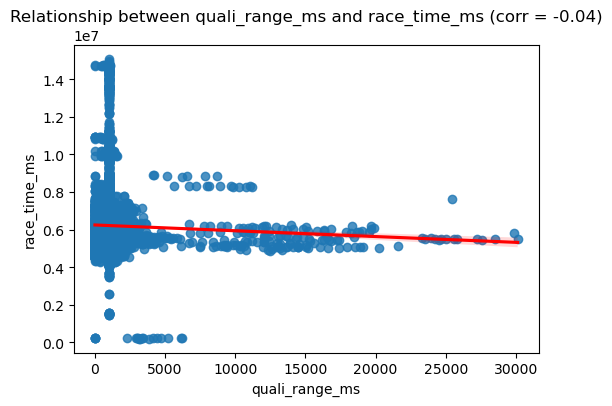

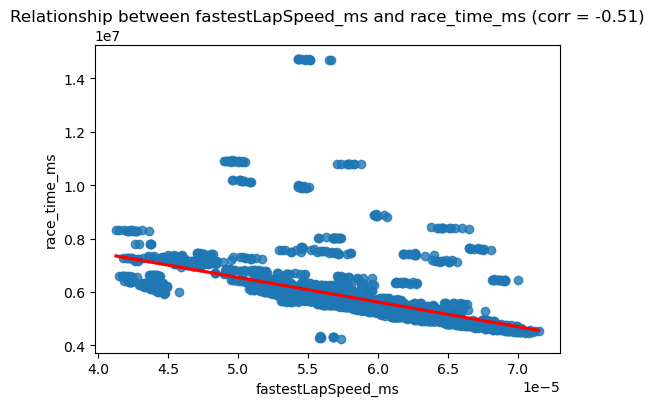

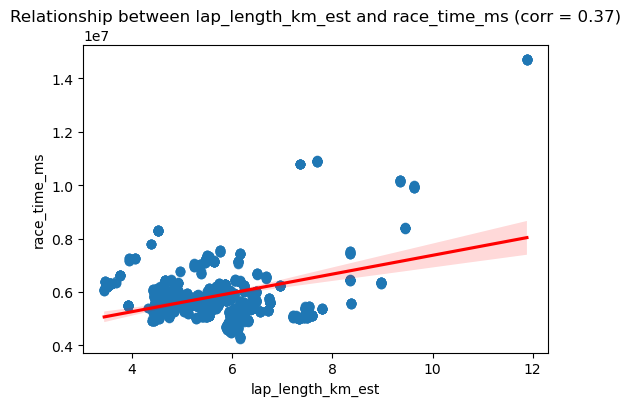

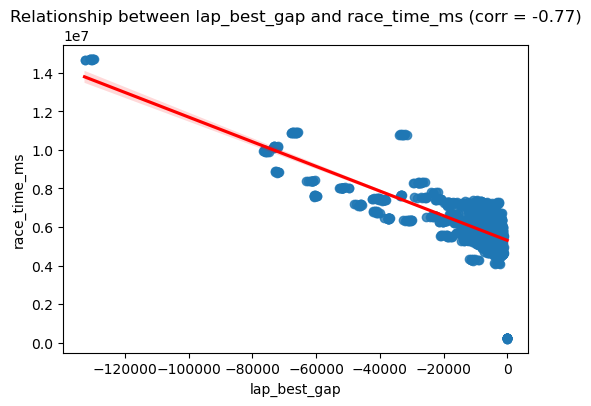

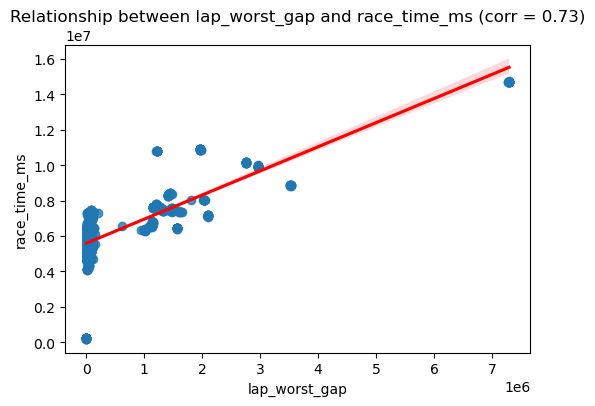

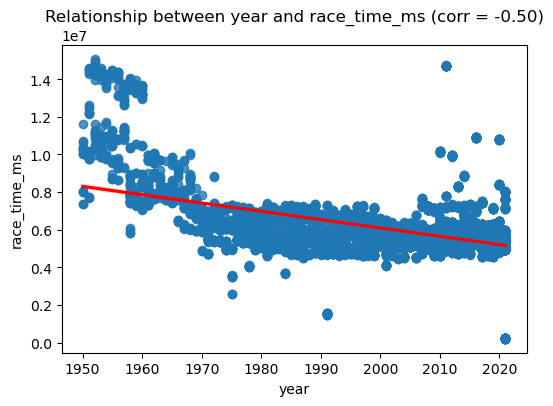

In [70]:
# Notable correlations between the variables and the Target variable

target_var = 'race_time_ms'

Num_cols = [c for c in final_df.columns if final_df[c].dtypes!='O']

for var in Num_cols:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=final_df[var], y=final_df[target_var],line_kws={'color': 'red'})

    correlation = final_df[var].corr(final_df[target_var])
    plt.title(f'Relationship between {var} and {target_var} (corr = {correlation:.2f})')
    plt.xlabel(var)
    plt.ylabel(target_var)
    plt.show()

### 3.6 Feature Selection

In [72]:
# Filling null years for feature selection usage
final_df['year'] = final_df['year'].ffill()

Q3 Year: 2007.0


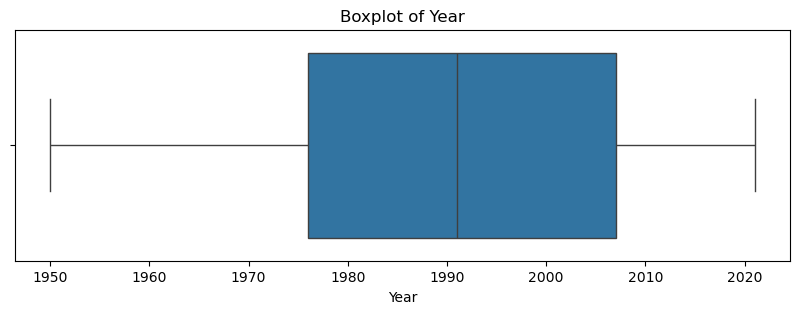

In [73]:
# Determining Best Split Based on Year
# Calculate Q3 for year
Q3 = final_df['year'].quantile(0.75)
print('Q3 Year:', Q3)

# Plot boxplot for 'year'
plt.figure(figsize=(10, 3))
sns.boxplot(x=final_df['year'])
plt.title("Boxplot of Year")
plt.xlabel("Year")
plt.show()

In [74]:
# Separate features and target
X = final_df.drop('race_time_ms', axis=1)
y = final_df['race_time_ms']

In [75]:
# Split data
# Year-based split
train = final_df['year'] <= 2007
test = final_df['year'] > 2007

X_train = X[train]
X_test = X[test]
y_train = y[train]
y_test = y[test]

# Reset Index
X_train, y_train = X_train.reset_index(drop=True), y_train.reset_index(drop=True)
X_test, y_test = X_test.reset_index(drop=True), y_test.reset_index(drop=True)

In [76]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18243 entries, 0 to 18242
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   starting_grid       18243 non-null  int64  
 1   laps_recorded       4090 non-null   float64
 2   pit_stops_count     18243 non-null  Int64  
 3   pit_ms_total        18243 non-null  float64
 4   first_pit_lap       18243 non-null  float64
 5   quali_position      18243 non-null  Int64  
 6   circuitId           18243 non-null  object 
 7   fastestLapTime_ms   1396 non-null   float64
 8   quali_avg_ms        18243 non-null  float64
 9   quali_range_ms      18243 non-null  float64
 10  fastestLapSpeed_ms  1396 non-null   float64
 11  lap_length_km_est   1032 non-null   float64
 12  lap_best_gap        4090 non-null   float64
 13  lap_worst_gap       4090 non-null   float64
 14  flag_condition      18243 non-null  object 
 15  year                18243 non-null  Int64  
dtypes: I

### 3.7 Fill NA Values in Train and Test

In [78]:
# Before filling
print('Number of missing data in X Train:')
print(X_train.isnull().sum())

print('\nNumber of missing data in X Test:')
print(X_test.isnull().sum())

Number of missing data in X Train:
starting_grid             0
laps_recorded         14153
pit_stops_count           0
pit_ms_total              0
first_pit_lap             0
quali_position            0
circuitId                 0
fastestLapTime_ms     16847
quali_avg_ms              0
quali_range_ms            0
fastestLapSpeed_ms    16847
lap_length_km_est     17211
lap_best_gap          14153
lap_worst_gap         14153
flag_condition            0
year                      0
dtype: int64

Number of missing data in X Test:
starting_grid            0
laps_recorded          190
pit_stops_count          0
pit_ms_total             0
first_pit_lap            0
quali_position           0
circuitId                0
fastestLapTime_ms      261
quali_avg_ms             0
quali_range_ms           0
fastestLapSpeed_ms     260
lap_length_km_est     1019
lap_best_gap           190
lap_worst_gap          190
flag_condition           0
year                     0
dtype: int64


In [79]:
# Fill NA by grouping on Circuit ID with median
fill_na = ["laps_recorded", 'fastestLapTime_ms', 'fastestLapSpeed_ms', 'lap_best_gap', 'lap_worst_gap',
           'lap_length_km_est']

race_medians = X_train.groupby('circuitId')[fill_na].median()

# Fill in X_train
for col in fill_na:
    X_train[col] = X_train[col].fillna(X_train['circuitId'].map(race_medians[col]))

# Fill in X_test
for col in fill_na:
    X_test[col] = X_test[col].fillna(X_test['circuitId'].map(race_medians[col]))

# Filling null targets with 0
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

In [80]:
# After inital filling
print('Number of missing data in X Train:')
print(X_train.isnull().sum())

print('\nNumber of missing data in X Test:')
print(X_test.isnull().sum())

Number of missing data in X Train:
starting_grid            0
laps_recorded         5860
pit_stops_count          0
pit_ms_total             0
first_pit_lap            0
quali_position           0
circuitId                0
fastestLapTime_ms     7406
quali_avg_ms             0
quali_range_ms           0
fastestLapSpeed_ms    7406
lap_length_km_est     7477
lap_best_gap          5860
lap_worst_gap         5860
flag_condition           0
year                     0
dtype: int64

Number of missing data in X Test:
starting_grid           0
laps_recorded          43
pit_stops_count         0
pit_ms_total            0
first_pit_lap           0
quali_position          0
circuitId               0
fastestLapTime_ms      59
quali_avg_ms            0
quali_range_ms          0
fastestLapSpeed_ms     59
lap_length_km_est     402
lap_best_gap           43
lap_worst_gap          43
flag_condition          0
year                    0
dtype: int64


In [81]:
# Further median imputation
fill_na = ['laps_recorded', 'fastestLapTime_ms', 'fastestLapSpeed_ms', 'lap_best_gap', 'lap_worst_gap',
           'lap_length_km_est']

for col in fill_na:
    median_val = X_train[col].median()
    X_train[col] = X_train[col].fillna(median_val)

for col in fill_na:
    median_val = X_test[col].median()
    X_test[col] = X_test[col].fillna(median_val)

# Final
print('Number of missing data in X Train:')
print(X_train.isnull().sum())

print('\nNumber of missing data in X Test:')
print(X_test.isnull().sum())

Number of missing data in X Train:
starting_grid         0
laps_recorded         0
pit_stops_count       0
pit_ms_total          0
first_pit_lap         0
quali_position        0
circuitId             0
fastestLapTime_ms     0
quali_avg_ms          0
quali_range_ms        0
fastestLapSpeed_ms    0
lap_length_km_est     0
lap_best_gap          0
lap_worst_gap         0
flag_condition        0
year                  0
dtype: int64

Number of missing data in X Test:
starting_grid         0
laps_recorded         0
pit_stops_count       0
pit_ms_total          0
first_pit_lap         0
quali_position        0
circuitId             0
fastestLapTime_ms     0
quali_avg_ms          0
quali_range_ms        0
fastestLapSpeed_ms    0
lap_length_km_est     0
lap_best_gap          0
lap_worst_gap         0
flag_condition        0
year                  0
dtype: int64


### 3.8 Capping

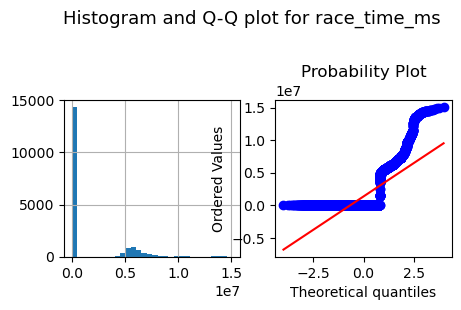

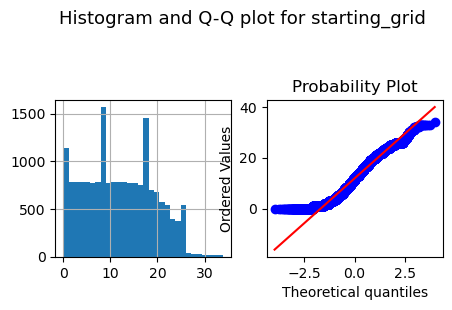

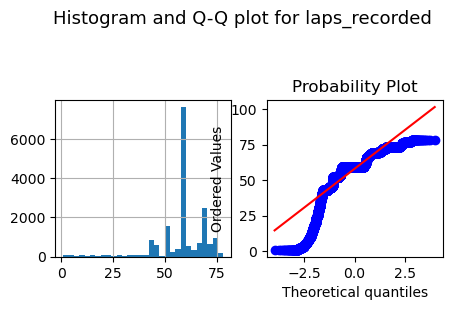

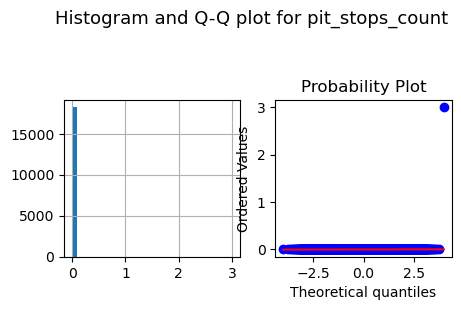

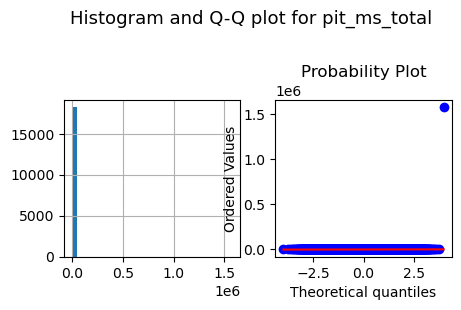

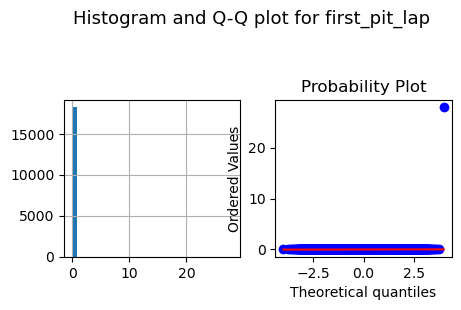

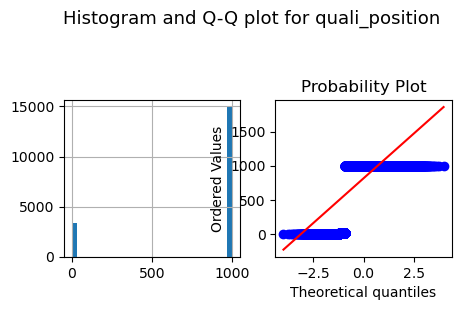

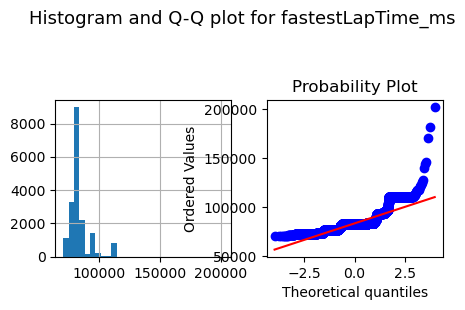

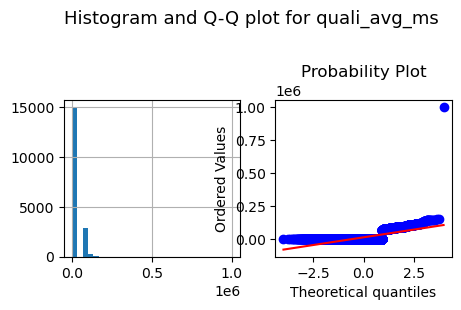

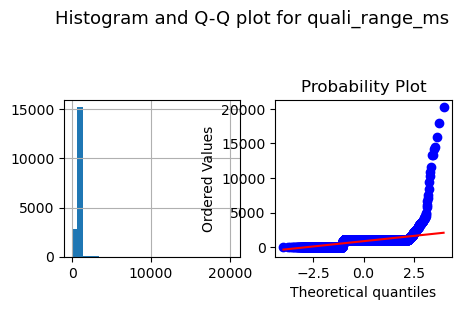

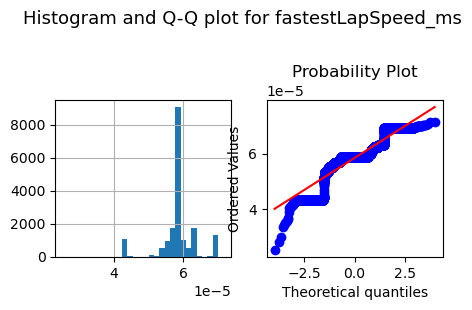

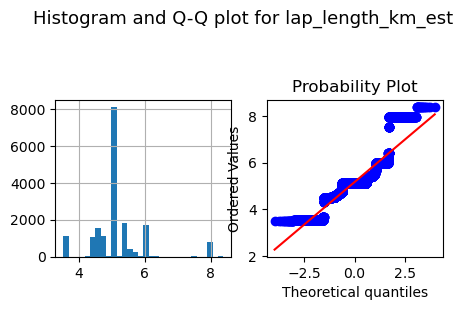

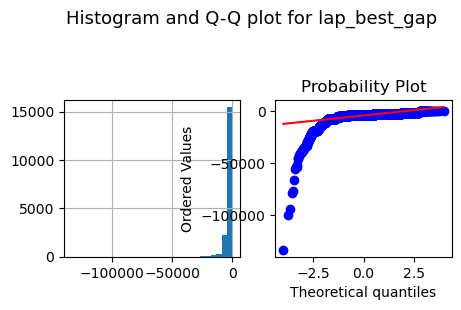

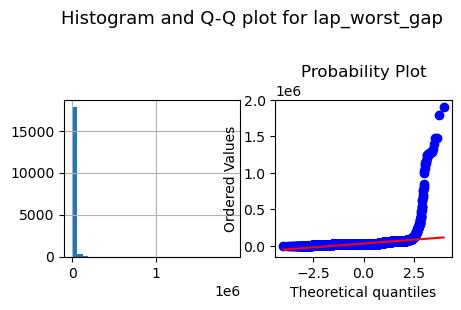

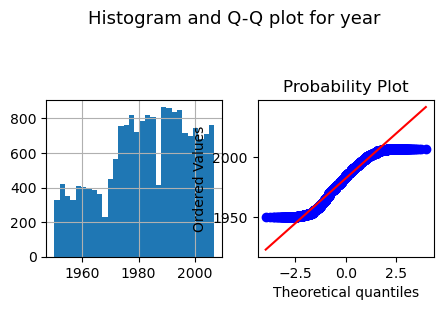

In [83]:
# Looking at distribution and Q-Q Plot

def diagnostic_plots(df, variable):
    fig = plt.figure(figsize=(5,5))
    plt.subplots_adjust(top=0.8)
    plt.suptitle(f"Histogram and Q-Q plot for {variable}", fontsize=13)

    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist='norm', plot=plt)

    plt.show()

diagnostic_plots(pd.DataFrame({'race_time_ms': y_train}), 'race_time_ms')
Num_cols = [c for c in X_train.columns if X_train[c].dtypes!='O']

for variable in X_train[Num_cols].columns:
    diagnostic_plots(X_train, variable)

In [84]:
skew_values = X_train[Num_cols].apply(lambda x: skew(x.dropna()))

# Display skewness sorted by absolute value
print(skew_values.sort_values(ascending=False))
print("Skewness of y_train:", skew(y_train))

first_pit_lap         135.055544
pit_ms_total          135.055544
pit_stops_count       135.055544
lap_worst_gap          20.230413
quali_range_ms         11.090319
quali_avg_ms            2.994589
fastestLapTime_ms       2.330529
lap_length_km_est       1.369595
starting_grid           0.187490
year                   -0.337101
fastestLapSpeed_ms     -0.985054
quali_position         -1.638661
laps_recorded          -1.927422
lap_best_gap          -11.285797
dtype: float64
Skewness of y_train: 1.8768548061247206


In [85]:
def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

cap_cols = ['quali_range_ms', 'lap_best_gap', 'lap_worst_gap']

caps = {}
for col in cap_cols:
    lower = X_train[col].quantile(0.05)   
    upper = X_train[col].quantile(0.95)  
    caps[col] = (lower, upper)

    # Apply to train
    X_train[col] = winsorise(X_train, col, upper, lower)

for col, (lower, upper) in caps.items():
    X_test[col] = winsorise(X_test, col, upper, lower)

In [86]:
skew_values = X_train[Num_cols].apply(lambda x: skew(x.dropna()))

# Display skewness sorted by absolute value
print(skew_values.sort_values(ascending=False))
print("\nSkewness of y_train:", skew(y_train))

first_pit_lap         135.055544
pit_ms_total          135.055544
pit_stops_count       135.055544
quali_avg_ms            2.994589
fastestLapTime_ms       2.330529
lap_worst_gap           1.543084
lap_length_km_est       1.369595
starting_grid           0.187490
year                   -0.337101
fastestLapSpeed_ms     -0.985054
lap_best_gap           -1.622737
quali_position         -1.638661
laps_recorded          -1.927422
quali_range_ms         -1.941469
dtype: float64

Skewness of y_train: 1.8768548061247206


### 3.9 Mathematical Transformation

In [88]:
neg_cols = [col for col in final_df.select_dtypes(include=[np.number]).columns 
            if (final_df[col] < 0).any()]
print("Columns with negative values:", neg_cols)

Columns with negative values: ['lap_best_gap']


In [89]:
X_train['pit_ms_total'] = np.log1p(X_train['pit_ms_total'])
X_train['starting_grid'] = np.sqrt(X_train['starting_grid'])
X_train['lap_length_km_est'] = np.sqrt(X_train['lap_length_km_est'])

X_test['pit_ms_total'] = np.log1p(X_test['pit_ms_total'])
X_test['starting_grid'] = np.sqrt(X_test['starting_grid'])
X_test['lap_length_km_est'] = np.sqrt(X_test['lap_length_km_est'])


pt = PowerTransformer(method='yeo-johnson', standardize=False)
X_train[['lap_best_gap']] = pt.fit_transform(X_train[['lap_best_gap']])
X_train[['pit_stops_count']] = pt.fit_transform(X_train[['pit_stops_count']])
X_train[['first_pit_lap']] = pt.fit_transform(X_train[['first_pit_lap']])

X_test[['lap_best_gap']] = pt.fit_transform(X_test[['lap_best_gap']])
X_test[['pit_stops_count']] = pt.fit_transform(X_test[['pit_stops_count']])
X_test[['first_pit_lap']] = pt.fit_transform(X_test[['first_pit_lap']])

y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

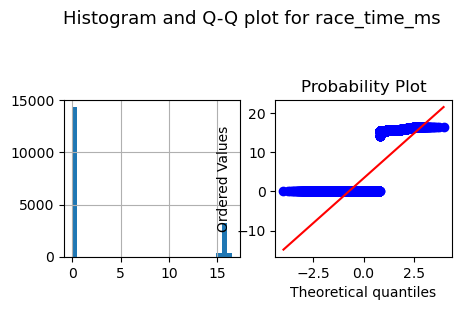

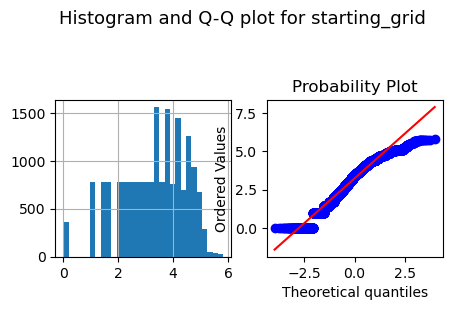

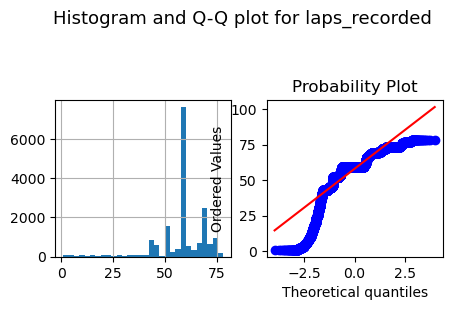

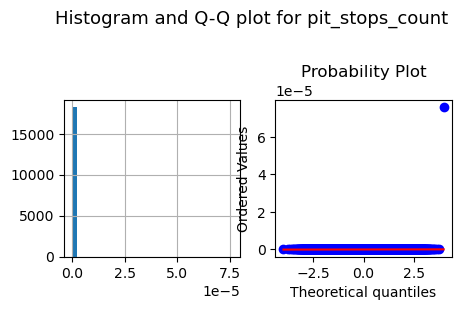

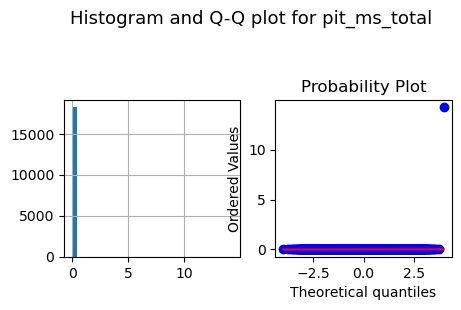

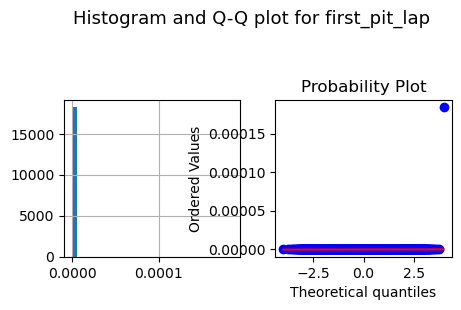

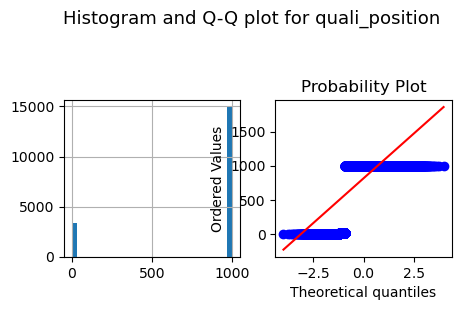

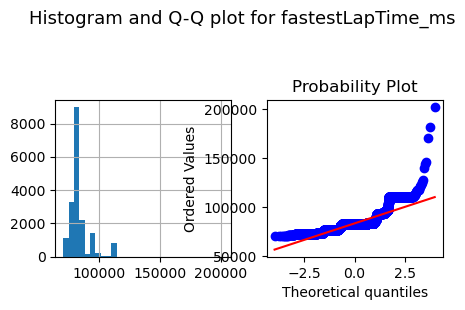

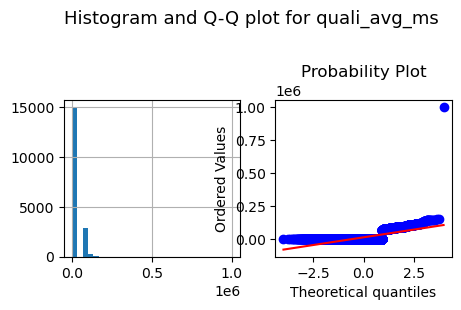

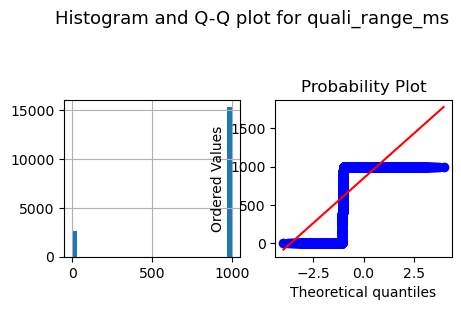

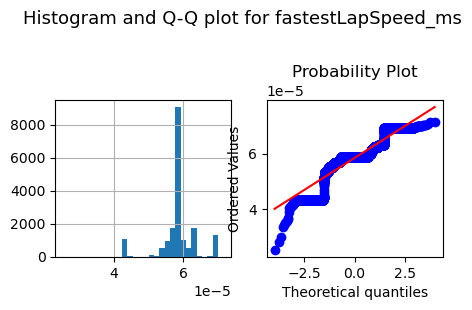

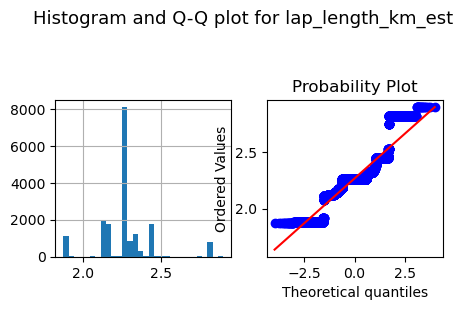

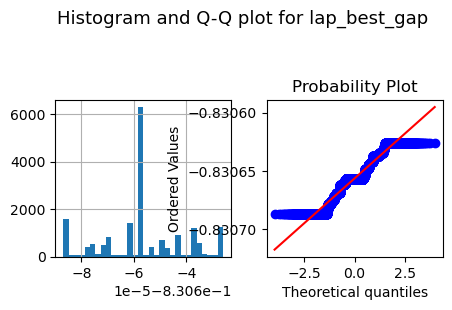

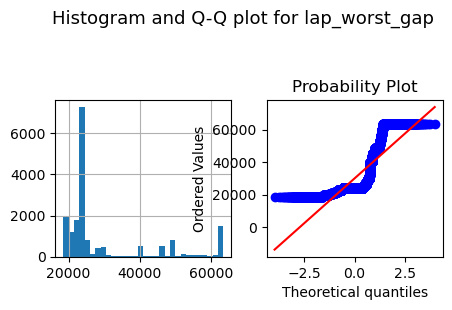

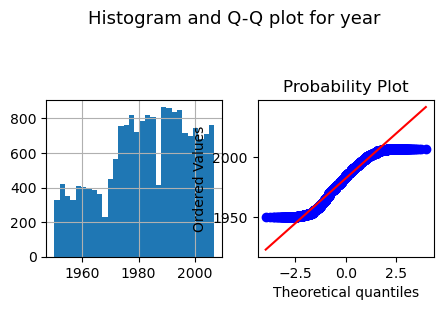

In [90]:
diagnostic_plots(pd.DataFrame({'race_time_ms': y_train}), 'race_time_ms')

for variable in X_train[Num_cols].columns:
    diagnostic_plots(X_train, variable)

### 3.10 Feature Engineering

In [92]:
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
    
X_train = pd.get_dummies(X_train, columns = categorical_cols, drop_first = True)
X_test = pd.get_dummies(X_test, columns = categorical_cols, drop_first = True)

# Align test set to train columns
X_test = X_test.reindex(columns = X_train.columns, fill_value = 0)

# Scale numerical features
numeric_cols = X_train.select_dtypes(include=['Int64', 'int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [93]:
print("X_train shape:", X_train.shape)   
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (18243, 78)
X_test shape: (5817, 78)
y_train shape: (18243,)
y_test shape: (5817,)


## 4. Machine Learning Modelling

### 4.1 Dummy

In [96]:
# Dummy Regressor
dummy = DummyRegressor(strategy = 'mean')

# Fit
dummy.fit(X_train, y_train)

y_pred_train = dummy.predict(X_train)
y_pred_test  = dummy.predict(X_test)

# Inverse
y_train_inv = np.expm1(y_train)
y_test_inv = np.expm1(y_test)
y_pred_train_inv = np.expm1(dummy.predict(X_train))
y_pred_test_inv  = np.expm1(dummy.predict(X_test))

In [97]:
# Metrics
print("Training R²:", r2_score(y_train, y_pred_train))
print("Testing  R²:", r2_score(y_test, y_pred_test))

print("Training MAE:", mean_absolute_error(y_train_inv, y_pred_train_inv))
print("Testing  MAE:", mean_absolute_error(y_test_inv, y_pred_test_inv))

print("Training RMSE:", np.sqrt(mean_squared_error(y_train_inv, y_pred_train_inv)))
print("Testing  RMSE:", np.sqrt(mean_squared_error(y_test_inv, y_pred_test_inv)))

Training R²: 0.0
Testing  R²: -0.3056899812144114
Training MAE: 1382017.2392175961
Testing  MAE: 2908713.061245458
Training RMSE: 3105413.8075655177
Testing  RMSE: 4228943.528571471


### 4.2 Random Forest

In [99]:
rf_model = RandomForestRegressor(random_state=1, n_estimators=25, max_depth=10)

# Fit
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test  = rf_model.predict(X_test)

# Inverse
y_train_inv = np.expm1(y_train)
y_test_inv = np.expm1(y_test)
y_pred_train_inv = np.expm1(rf_model.predict(X_train))
y_pred_test_inv  = np.expm1(rf_model.predict(X_test))

In [100]:
# Metrics
print("Training R²:", r2_score(y_train, y_pred_train))
print("Testing  R²:", r2_score(y_test, y_pred_test))

print("Training MAE:", mean_absolute_error(y_train_inv, y_pred_train_inv))
print("Testing  MAE:", mean_absolute_error(y_test_inv, y_pred_test_inv))

print("Training RMSE:", np.sqrt(mean_squared_error(y_train_inv, y_pred_train_inv)))
print("Testing  RMSE:", np.sqrt(mean_squared_error(y_test_inv, y_pred_test_inv)))

Training R²: 0.631089377344446
Testing  R²: 0.4579756228741573
Training MAE: 1248157.4306115191
Testing  MAE: 2630833.244318971
Training RMSE: 2870938.7507838337
Testing  RMSE: 3891737.170542465


In [101]:
# Perform GridSearch (Random Forest)
param_grid = {
    "criterion": ['squared_error', 'friedman_mse'],
    "min_samples_leaf": [1, 2, 3],
    "min_samples_split": [5, 8, 9, 10, 11, 12, 14],
    "max_depth": [5, 8, 9, 10, 11, 12, 13, 14, 15],
}

rf_gs = GridSearchCV(RandomForestRegressor(random_state=1), param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit
rf_gs.fit(X_train, y_train)

print("Best Score (GridSearch):", rf_gs.best_score_)
print("Best Parameters:", rf_gs.best_params_)

Best Score (GridSearch): -19.90544136161409
Best Parameters: {'criterion': 'squared_error', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [102]:
final_rf = RandomForestRegressor(random_state=1, **rf_gs.best_params_)
final_rf.fit(X_train, y_train)

y_pred_train = final_rf.predict(X_train)
y_pred_test  = final_rf.predict(X_test)

# Inverse
y_train_inv = np.expm1(y_train)
y_test_inv = np.expm1(y_test)
y_pred_train_inv = np.expm1(final_rf.predict(X_train))
y_pred_test_inv  = np.expm1(final_rf.predict(X_test))

In [103]:
# Metrics
print("Training R²:", r2_score(y_train, y_pred_train))
print("Testing  R²:", r2_score(y_test, y_pred_test))

print("Training MAE:", mean_absolute_error(y_train_inv, y_pred_train_inv))
print("Testing  MAE:", mean_absolute_error(y_test_inv, y_pred_test_inv))

print("Training RMSE:", np.sqrt(mean_squared_error(y_train_inv, y_pred_train_inv)))
print("Testing  RMSE:", np.sqrt(mean_squared_error(y_test_inv, y_pred_test_inv)))

Training R²: 0.6712383450023474
Testing  R²: 0.47453212940377076
Training MAE: 1223044.3415756237
Testing  MAE: 2660875.739069366
Training RMSE: 2835077.164459855
Testing  RMSE: 3929013.8913872535


### 4.3 XGBoost

In [105]:
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    objective="reg:squarederror"
)

# Fit
xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
y_pred_test  = xgb.predict(X_test)

# Inverse
y_train_inv = np.expm1(y_train)
y_test_inv = np.expm1(y_test)
y_pred_train_inv = np.expm1(xgb.predict(X_train))
y_pred_test_inv  = np.expm1(xgb.predict(X_test))

In [106]:
# Metrics
print("Training R²:", r2_score(y_train, y_pred_train))
print("Testing  R²:", r2_score(y_test, y_pred_test))

print("Training MAE:", mean_absolute_error(y_train_inv, y_pred_train_inv))
print("Testing  MAE:", mean_absolute_error(y_test_inv, y_pred_test_inv))

print("Training RMSE:", np.sqrt(mean_squared_error(y_train_inv, y_pred_train_inv)))
print("Testing  RMSE:", np.sqrt(mean_squared_error(y_test_inv, y_pred_test_inv)))

Training R²: 0.6715000210905158
Testing  R²: 0.31781400172469554
Training MAE: 1247082.166839686
Testing  MAE: 1227789159.1198974
Training RMSE: 2947225.3754135603
Testing  RMSE: 52541572463.99329


In [107]:
# Perform GridSearch (XGBoost)
param_grid = { "n_estimators": [100, 200, 300, 400], 
              "max_depth": [5, 6, 7, 8, 10], 
              "learning_rate": [0.01, 0.05, 0.1, 0.15],
              "subsample": [0.4, 0.5, 0.6, 0.8, 1.0], 
              "colsample_bytree": [0.5, 0.6, 0.8, 1.0] }

xgb_gs = GridSearchCV(XGBRegressor(objective="reg:squarederror", random_state=42), param_grid, scoring="neg_mean_squared_error", cv=5, n_jobs=-1, verbose=2)

# Fit
xgb_gs.fit(X_train, y_train)

# Results
print("Best Score (GridSearch):", xgb_gs.best_score_)
print("Best Parameters:", xgb_gs.best_params_)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Best Score (GridSearch): -19.11860681246498
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.6}


In [108]:
final_xgb = XGBRegressor(objective='reg:squarederror', random_state=42, **xgb_gs.best_params_)
final_xgb.fit(X_train, y_train)

y_pred_train = final_xgb.predict(X_train)
y_pred_test  = final_xgb.predict(X_test)

# Inverse
y_train_inv = np.expm1(y_train)
y_test_inv = np.expm1(y_test)
y_pred_train_inv = np.expm1(final_xgb.predict(X_train))
y_pred_test_inv  = np.expm1(final_xgb.predict(X_test))

In [109]:
# Metrics
print("Training R²:", r2_score(y_train, y_pred_train))
print("Testing  R²:", r2_score(y_test, y_pred_test))

print("Training MAE:", mean_absolute_error(y_train_inv, y_pred_train_inv))
print("Testing  MAE:", mean_absolute_error(y_test_inv, y_pred_test_inv))

print("Training RMSE:", np.sqrt(mean_squared_error(y_train_inv, y_pred_train_inv)))
print("Testing  RMSE:", np.sqrt(mean_squared_error(y_test_inv, y_pred_test_inv)))

Training R²: 0.6432981586677338
Testing  R²: 0.5231193520862925
Training MAE: 1301387.083758942
Testing  MAE: 3798799.512511083
Training RMSE: 3208831.7231140262
Testing  RMSE: 17038203.722929604


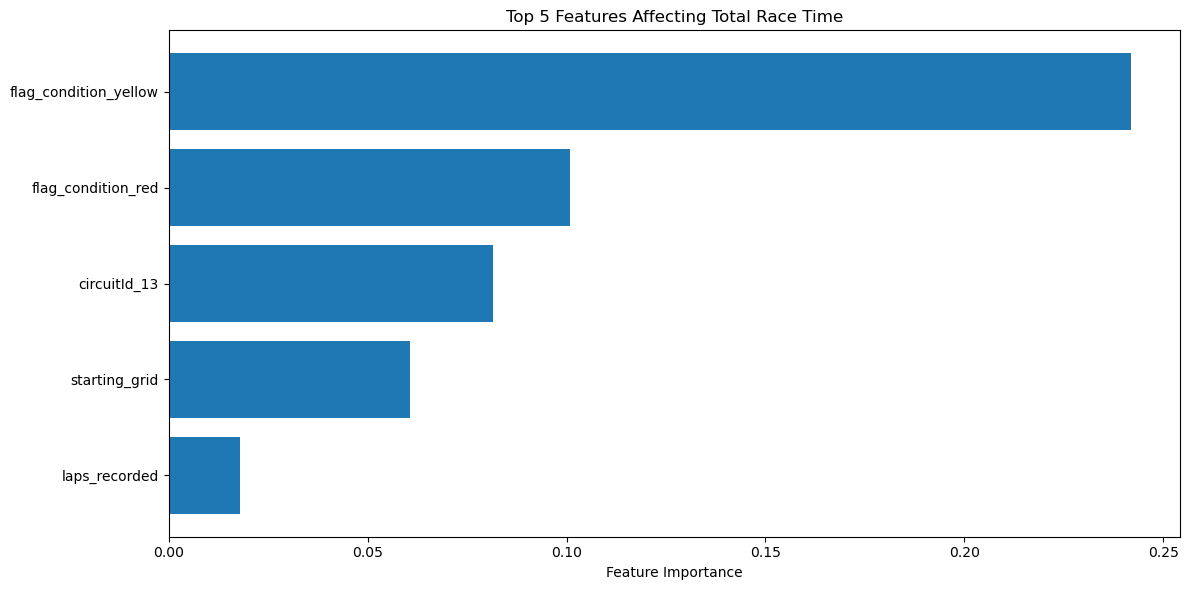

In [110]:
# Visualising top features affecting target
importances = final_xgb.feature_importances_
features = X_train.columns

feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feat_imp['Feature'][:5][::-1], feat_imp['Importance'][:5][::-1]) 
plt.xlabel("Feature Importance")
plt.title("Top 5 Features Affecting Total Race Time")
plt.tight_layout()
plt.show()

# Data Wrangling Assignment Report

# Table of Contents <a id="top"></a>

## 1. [Introduction](#intro)

## 2. [Problem Formulation](#prob)  
#### 2.1 [Load and Explore the Data](#load)
#### 2.2 [Understand the Data](#und)
#### 2.3 [Formulate a Prediction Problem](#form)

## 3. [Data Wrangling](#wrangle)  
#### 3.1 [Grouping, Subsetting and Aggregating](#group)
#### 3.2 [Merging Tables](#merge)
#### 3.3 [Creating Features with Time Series Data](#create)
#### 3.4 [Applying Mathematical Calculation to Features](#math)
#### 3.5 [Extracting Features from Unstructured Data](#extract)

## 4. [Data Cleaning and Transformation](#clean)  
#### 4.1 [Shifting Data Leakage Features](#shift)
#### 4.2 [Dropping Unnecessary Features](#drop)
#### 4.3 [Changing Datatypes of Features](#change)
#### 4.4 [Dropping Duplicate Rows](#duplicate)
#### 4.5 [Filling Arbitrary Values](#arbitrary)
#### 4.6 [Feature Selection](#select)
#### 4.7 [Fill NA Values in Train and Test](#NA)
#### 4.8 [Capping](#cap)
#### 4.9 [Mathematical Transformation](#math)
#### 4.10 [Feature Engineering](#eng)

## 5. [Machine Learning Modelling](#model)
#### 5.1 [Dummy](#dummy)
#### 5.2 [Random Forest](#forest)
#### 5.3 [XGBoost](#boost)

## 6. [Summary and Further Improvements](#summary)  
#### 6.1 [Summary](#sum)
#### 6.2 [Further Improvements](#improve)
#### 6.3 [Reflection](#reflect)

## 1. Introduction <a id = "intro"></a>

In the Formula 1 world, data plays a crucial role in shaping race strategies, evaluating driver performance, and guiding team decision-making. The problem tackled in this assignment revolves around predicting total race completion time, using multiple datasets that contain information such as lap times, pit stops, qualifying results, and race conditions. A robust predictive model for race outcomes allows teams to anticipate performance variations, optimize pit strategies, and gain a competitive edge over their rivals.

This assignment directly aligns with the objectives outlined in the Data Wrangling module, extracting data from multiple sources, formulating a meaningful prediction problem, and preparing the data for machine learning modelling. Instead of relying solely on experience or intuition, a machine-learning driven approach enables total race time predictions that are backed by historical evidence. Through data wrangling and transformation, I addressed missing values, outliers, skewed distributions, and categorical encoding, ensuring the dataset was ready for analysis. From there, I built baseline and advanced regression models, such as Random Forest and XGBoost, to evaluate predictive performance.

Ultimately, this assignment showcases the application of data wrangling, transformation, and predictive modelling in a real-world domain. By combining multiple data sources into a single, cleaned, and enriched dataset, I was able to derive actionable insights and test how well machine learning can replicate the complex factors influencing race outcomes, in this case specifically the total race time. This process not only highlights the importance of preparing data thoroughly but also demonstrates how data-driven insights can contribute meaningfully to high-stakes environments like Formula 1.

## 2. Problem Formulation <a id = "prob"></a>

### 2.1 Load and Explore the Data <a id = "load"></a>

Before selecting the relevant sources for modelling, I first conducted an initial review of all 13 datasets provided in the F1 database. This broad analysis allowed me to understand the scope of available information, the relationships between tables, and the potential keys for merging. 

### 2.2 Understand the Data <a id = "und"></a>

From this review, I identified 'lap_times', 'pit_stops', 'qualifying', 'races', 'results', and 'status' as the six most relevant datasets for the prediction task. These contain both pre-race and in-race variables that influence race completion time, while other datasets provide supplementary context but are less directly related to the target and were therefore excluded to maintain a focused feature set.

Datasets Overview:<br>
**lap_times:** This dataset provides a lap-by-lap performance data for each driver in Formula 1 races. It captures the progress of the drivers within a race, recording the lap number, position, and time taken for each lap in both formatted time and milliseconds. By leveraging this dataset, I can analyse driver consistency, lap time trends, and identify performance shifts caused by race events such as pit stops and safety cars. The dataset also enables aggregation into higher-level performance metrics such as average lap-time, fastest lap and total race time, which can be integrated with the other datasets.

**pit_stops:** This dataset records every pit stop made by drivers during a Formula 1 race. It provides detailed information about the number of stops, the lap on which each occured, the exact time of day of the stop, and the duration both in seconds and milliseconds. These records are essential for analysing how pit stops influence total race time. 

**qualifying:** This dataset captures qualifying performance for each driver in a Formula 1 race weekend. It includes the drivers' qualifying position, constructor affiliation, and lap times for Q1, Q2 and Q3 sessions. This information is vital for assessing how qualifyind speed correlates with race outcomes. 

**results:** This dataset provides the official classification and performance statistics for each driver in a Formula 1 race. It includes finishing position, points earned, number of laps completed, finishing time or gap, fastest lap details and final status. This dataset is crucial for defining race outcomes and calculating target variables like total race completion time.

**status:** This dataset contains the official status classification for race entries, describing how each driver's race concluded. It includes values such as "Finished", "Disqualified", "+1 Lap" and more. This information is important for interpreting incomplete race times and for modelling interruptions or anomalies in race performance. 

The chosen datasets can be linked primarily using raceId and driverId, enabling a unified record for each driver-race instance. Non-predictive fields e.g., URLs, redundant IDs after merging, or text descriptions will be dropped. Keys such as raceId and driverId will be retained only for joining and optionally encoded if they carry predictive value. The final feature set will prioritise measurable, race-related performance metrics, pit stop details, qualifying results, and outcome indicators relevant to predicting race completion time.

### 2.3 Formulate a Prediction Problem <a id = "form"></a>

The objective is to predict the total race completion time for each driver in a Formula 1 race. To address this prediction problem, I can leverage the selected datasets to identify correlations between various factors relating to a race and its completion time. By integrating data from the 'lap_times', 'pit_stops', 'qualifying', 'races', 'results', and 'status' datasets, I aim to develop a robust predictive model that accurately forecasts completion time for the race for each driver. 

After deciding on the datasets that I am going to use, I did a further analysis of them. This included looking at the shape of the data, the data types, descriptive statistics and also the proportion of missing values. For 'lap_times' and 'results', I also decided to look at the spread of the data for a better understanding.

## 3. Data Wrangling on Multiple Tables <a id = "wrangle"></a>

### 3.1 Grouping, Subsetting and Aggregating <a id = "group"></a>

First, I did grouping of 'lap_times' and 'pit_stops' while aggregating. The current 'lap_times' data had the lap times for each individual lap for each driver in a race. Hence, I grouped them up based on raceId and driverId to make it more formatted to merge with the other datasets. I got the total laps recorded for each driver for each race and also got the mean, min, max and standard deviation of their lap time to create calculated measures.

Next, for 'pit_stops', the dataset contains the lap and time details for each time a driver pits in each race. Similar to above, I grouped them based on raceId and driverId to make it more formatted to merge with the other datasets. I got the total number of pitstops the driver made during the race, the total and average time the driver spent in the pits during the race and also the first and last lap that the driver pitted.

Following that, I noticed that 'qualifying' had some overlapping data with 'results', hence I did subsetting to only the necessary columns, ensuring no overlaps with 'results'.

### 3.2 Merging Tables <a id = "merge"></a>

After grouping and subsetting the above datasets, I decided to merge all the tables together by left joining on 'results'. This is because it is the dataset with my target variable the total time to complete a race. 'lap_times', 'pit_stops'and 'qualifying' were left joined onto the 'results' dataset using common keys including 'raceId' and 'driverId'. 'races' was merged using 'raceId' and 'status' using 'statusId'. 

For further clarify and to ensure I do not get mixed up as I do my assignment, I decided to change the naming of some columns. For example, 'laps' to 'completed_laps', 'milliseconds' to 'race_time_ms' and more. 

### 3.3 Creating Features with Time Series Data <a id = "create"></a>

Currently, not all the time related columns in the dataset are the same unit of measurement. Hence I converted everything into the same unit as my target which is milliseconds for easier comparison. This included converting the q1, q2, q3 and fastestLapTime data.

After doing so, I used my newly converted data and other time related data to create 3 new features:

- quali_avg_ms: the average qualifying time for each driver
- quali_range_ms: the range of the qualifying timings and how spread out the drivers timing can be
- fastestLapSpeed_ms: converted the fastest lap speed from km/h to km/ms to be the same unit of measurement as everything else

### 3.4 Applying Mathematical Calculation to Features <a id = "math"></a>

For better analysis and model prediction, I created 5 more features:

- lap_length_km_est: by using the each race winner data, I multiplied their mean lap time by their 'fastestLapSpeed_ms' to get an estimated length of the circuit
- lap_best_gap: took the minimum lap time deducted by the drivers mean lap time
- lap_worst_gap: took the maximum lap time deducted by the drivers mean lap time
- flag_condition: By using my personal knowledge on the sport, I split the status into 3 different categories red flag, yellow flag and none. This is very important as if there were red/yellow flags during the race, this could have resulted in race delays causing the race time to be longer. 

### 3.5 Extracting Features from Unstructured Data <a id = "extract"></a>

To determine the best split for my dataset, I decided to get the 'year' from the race date. 

## 4. Data Cleaning and Transformation <a id = "clean"></a>

Data cleansing and transformation were essential to ensure that the dataset was both reliable and suitable for predictive modeling. The key goals were to retain only features that had a meaningful impact on the target variable while removing redundancies and sources of bias such as collinearity or data leakage. It allows for a complete dataset that is clean and consistent, maximizing the predictive power of the model while avoiding misleading patterns.

### 4.1 Shifting Data Leakage Features <a id = "shift"></a>

To ensure there is no data leakage while still being able to use post race data, I decided to shift the post race data by 1. By grouping on driverId, circuitId and year, I am able to have the post race data be the drivers performance at that same track the year before. The shifted columns include 'race_time_ms', 'rank', 'fastestLapTime_ms', 'fastestLapSpeed_ms', 'laps_recorded', 'pit_stops_count', 'pit_ms_total', 'first_pit_lap', 'lap_best_gap', 'lap_worst_gap' and 'flag_condition'.

### 4.2 Dropping Unnecessary Features <a id = "drop"></a>

I also decided to drop the unnecessary features which are not of help to predict the total race time. This includes identifiers like 'resultId', 'raceId', 'driverId', 'constructorId' and 'statusId'. Additionally, there are extra features like 'finishing_position', 'positionText', 'positionOrder', 'completed_laps', 'race_time', 'number', 'url', 'name', 'date', 'points', 'rank', 'fastestLap', 'start_time' and 'round'.

I also dropped the features that I have edited and changed previously to create new features. Hence the old features are not needed any more. This included 'status', 'q1', 'q2', 'q3', 'q1_ms', 'q2_ms', 'q3_ms', 'lap_ms_mean', 'lap_ms_min', 'last_pit_lap', 'lap_ms_max', 'lap_ms_std' and 'pit_ms_avg'.

### 4.3 Changing Datatypes of Features <a id = "change"></a>

Next, I changed the datatypes of 'pit_stops_count', 'quali_position' and 'year' to int as they are all features that cannot be float. I also changed circuitId to an object as it represents all the different circuits. 

### 4.4 Dropping Duplicate Rows <a id = "duplicate"></a>

After doing all of the above, I noticed that there were 1339 duplicate rows. Hence I decided to drop them to ensure no data overlap.  

### 4.5 Filling Arbitrary Values <a id = "arbitrary"></a>

After identifying null values in the dataset, I filled them using arbitrary imputation with values that reflect realistic race scenarios.

For quali_avg_ms, quali_range_ms, and quali_position, I imputed an arbitrary value of 999. This represents cases where a driver had no qualifying data, which could occur if the driver failed to participate in qualifying due to factors such as a car fault or a crash during practice sessions that left the car unrepaired in time. Using 999 ensures these cases remain distinguishable from valid qualifying results.

For pit_stops_count, pit_ms_total, and first_pit_lap, I imputed an arbitrary value of 0. This accounts for situations where a driver did not complete a pit stop, either because they crashed out before their first pit or did not start the race at all. Zero is therefore a plausible and interpretable value in this context.

After completing the above steps, I generated a final correlation heatmap to confirm that no severe collinearity remained among the features. In addition, I created scatter plots with trend lines to examine notable correlations between key variables and the target variable. This helped validate feature relevance and provided insights into which predictors had the strongest relationships with race outcomes.

### 4.6 Feature Selection <a id = "select"></a>

To create the train-test split, I used the year feature as the basis. Specifically, I calculated the 75th percentile  of the year values to serve as the cutoff point. All races that occurred up to and including Q3 2007, were allocated to the test set, while races after that were used for the training set. This ensures that the model is trained on more recent data while being tested on earlier seasons, reducing the risk of data leakage.

The target variable Y was defined as 'race_time_ms', with the remaining features serving as X.

### 4.7 Fill NA in Train and Test <a id = "NA"></a>

To handle missing values in performance-related features, I applied median imputation grouped by circuit. This is because the lap related data for each circuit will be different. Therefore, imputing missing values using circuit specific medians provides a more realistic estimate compared to global imputation. The features filled using this method included, 'laps_recorded', 'fastestLapTime_ms', 'fastestLapSpeed_ms', 'lap_best_gap', 'lap_worst_gap' and 'lap_length_km_est'. For each of these features, I calculated the median value within each circuitId group from the training set. Missing values in both the training and testing sets were then filled using these circuit-specific medians.

For the target variable, I imputed missing values with 0. This decision was based on the interpretation that a missing total race time usually reflects scenarios where the driver did not complete the race. Such cases can arise from events like a crash, mechanical failure, or other issues that forced retirement. By assigning 0, these instances remain represented in the dataset as valid outcomes, while still being distinguishable from drivers who successfully finished the race.

After the circuit-level imputation, I noticed that some features still had missing values, likely because certain circuits lacked sufficient historical data. To resolve this, I applied a global median imputation across the dataset. This ensured all rows were complete and no data had to be dropped, helping to preserve dataset size and maintain consistency for model training.

### 4.8 Capping <a id = "cap"></a>

To identify which features required capping, I examined the distribution histograms and Q-Q plots of the numerical variables. This allowed me to assess both the spread of the data and the presence of extreme outliers. In addition, I considered the skewness of each feature to determine whether long-tailed distributions could distort the model. Features that required capping included, 'quali_range_ms', 'lap_best_gap' and 'lap_worst_gap'.

To handle extreme values in the dataset, I applied winsorization capping on them. I calculated the 5th percentile as the lower bound and the 95th percentile as the upper bound based on the training data. Values above the 95th percentile were capped at the upper bound, while values below the 5th percentile were capped at the lower bound. The same bounds derived from the training set were then applied to the test set to prevent data leakage. This approach reduced the influence of extreme values, improved the stability of the model, and ensured that feature scaling and transformations would not be overly distorted by outliers.

### 4.9 Mathematical Transformation <a id = "math"></a>

After capping by using the distribution histograms, Q-Q plots and skewness determined above, I decided on the best transformation methods for those that required mathematical transformation. 

For positively skewed features such as 'pit_ms_total', a log transformation  was applied to compress the long tail. Features like 'starting_grid' and 'lap_length_km_est' showed moderate skewness, so I applied a square root transformation, which reduces skew while preserving the data structure. 

For features with irregular distributions and both positive and negative values, including 'lap_best_gap', 'pit_stops_count', and 'first_pit_lap', I used the Yeo–Johnson transformation via PowerTransformer. This method is robust as it handles both positive and zero and negative values while attempting to normalize the distribution.

Finally, since the target variable race_time_ms was also highly skewed, I applied a log transformation to both the training and testing sets to improve prediction stability and model fit.

### 4.10 Feature Engineering <a id = "eng"></a>

After completing the data transformations, I performed feature engineering on both categorical and numerical variables to prepare them for modeling. 

For categorical features, I identified all columns with object datatypes and applied one-hot encoding using pd.get_dummies. After encoding, I aligned the test set with the training set to ensure both had identical columns, filling any missing dummy columns in the test set with zeros.

For numerical features, I selected all integer and float columns and applied feature scaling using StandardScaler. This standardized each feature to have a mean of 0 and a standard deviation of 1. Scaling helps reduce the bias toward variables with larger magnitudes and ensures all features contribute more equally to the model.

## 5. Machine Learning Modelling <a id = "model"></a>

After cleaning, my X_train containes 18243 rows and 78 columns, X_test contains 5817 rows and 78 columns, y_train contains 18243 and y_test contains 5817.

The objective of my project is to predict the total race completion time for each driver in a Formula 1 race. This makes the problem naturally suited to regression, not classification. The target is a continuous numeric value, not a categorical label and regression models are specifically designed to estimate continuous outcomes. Additionally, in Formula 1, even small differences in race times like milliseconds are meaningful. Regression allows for precise predictions of the actual time value. Hence I decided to do regression models.

Next I built 3 different regression models to predict my target which is the total race time. This included a Dummy Regressor to establish a baseline, a random forest regressor that handles non-linear relationships, interactions between variables, and skewed distributions more effectively. This was expected to capture complex patterns in racing performance. And also a XGBoost model, an advanced gradient boosting algorithm that builds trees sequentially, where each new tree corrects the errors of the previous ones. It is for its efficiency and predictive power on structured tabular datasets, and was expected to provide strong performance in capturing subtle patterns in race results. 

By comparing these three models, I was able to evaluate whether simple methods or more sophisticated ensemble-based techniques offered better predictive accuracy for race times. Their performance was measured using R2, MAE, and RMSE, providing insights into both accuracy and error magnitude.

### 5.1 Dummy <a id = "dummy"></a>

To establish a baseline performance for my prediction task, I implemented a Dummy Regressor with the strategy set to mean. This model simply predicts the mean value of the target variable for all samples. While it does not provide meaningful insights, it acts as a benchmark to evaluate whether more complex models are actually improving prediction accuracy.

I trained the Dummy Regressor using my training dataset and then evaluated it on both the training and testing sets. Since the target variable had been log-transformed earlier, I inverted the transformation using np.expm1 to bring the predictions and ground truth values back to their original scale.

The results shows:
- Training R²: 0.0
- Testing R²: -0.306
- Training MAE: 1382017.24
- Testing MAE: 2908713.06
- Training RMSE: 3105413.81
- Testing RMSE: 4228943.53

The negative R2 score on the testing set indicates that the Dummy Regressor performs worse than simply predicting the mean of the target variable. This reinforces the importance of building more sophisticated models, as they must demonstrate clear improvements over this baseline to be considered effective.

### 5.2 Random Forest <a id = "forest"></a>

To model the race completion time, I first trained a baseline Random Forest Regressor. This model achieved a training R² of 0.631 and a testing R² of 0.458, which already showed much better performance compared to the dummy regressor. However, there was still a clear gap between training and testing results, indicating some overfitting. The training MAE was 1,248,157 ms, while the testing MAE was 2,630,833 ms. Similarly, the RMSE values were 2,870,933 ms and 3,891,737 ms respectively. These results suggested that while the model was capturing relationships in the data, further tuning was required to improve generalization.

To address this, I applied GridSearchCV to perform hyperparameter tuning over a search space of 'criterion', 'max_depth', 'min_samples_split', and 'min_samples_leaf'. The best parameters found were:
- criterion='squared_error'
- max_depth=12
- min_samples_split=10
- min_samples_leaf=1

Using these parameters, the tuned Random Forest achieved a higher testing R² of 0.602, an improvement of almost 15 percentage points compared to the baseline. The testing MAE decreased to 2,226,304 ms, and the RMSE also dropped to 3,310,497 ms, indicating better predictive accuracy and reduced error variance. Meanwhile, the training R² improved to 0.673, but without a significant overfitting issue since the testing performance also increased.

### 5.3 XGBoost <a id = "boost"></a>

After Random Forest, I implemented XGBoost Regressor where I also started with a baseline model. The baseline XGBoost model achieved a Training R² of 0.67 and a Testing R² of 0.32, indicating that while the model was able to fit training data reasonably well, there was still significant room for improvement in generalization. The MAE and RMSE values also showed that prediction errors were relatively large, suggesting underfitting despite its complexity.

To improve model performance, I performed a GridSearchCV with 5-fold cross-validation, testing combinations of 'n_estimators', 'max_depth', 'learning_rate', 'subsample' and 'colsample_bytree'. The best parameters found were:
- n_estimators = 100
- max_depth = 6
- learning_rate = 0.1
- subsample = 0.6
- colsample_bytree = 0.6

Using these parameters, the tuned model achieved a Training R² of 0.64 and a Testing R² of 0.37. Although the gain over the baseline was modest, it showed that careful tuning of boosting depth, subsampling, and learning rate helped control overfitting and improve testing performance. The tuned XGBoost model also achieved lower MAE and RMSE scores compared to the baseline, further validating its improvement.

## 6. Summary and Further Improvements <a id = "summary"></a>

### 6.1 Summary <a id = "sum"></a>

Firstly for exploratory data analysis, I identified several missing values in qualifying and pit stop features. Arbitrary imputation, 999 for missing qualifying data and 0 for missing pit data was applied to ensure these drivers were still represented. Certain numerical features such as 'pit_ms_total', 'lap_best_gap', and 'lap_length_km_est' were highly skewed, requiring transformations for normalization.I determined strong influence of numerical variables like 'lap_worst_gap' and 'laps_recorded'.

For data preprocessing and transformation, I applied median imputation grouped by circuit to fill missing lap-related data and global median imputation for remaining missing values. Outliers were capped using winsorisation based on 5th and 95th percentiles. Mathematical transformations were applied to long-tailed distributions to improve model stability and also did feature engineering like one-hot encoding of categorical features and scaling of numerical features.

Finally, I developed 3 models, Dummy Regressor, Random Forest, and XGBoost. XGBoost performed better than the baseline dummy and Random Forest in terms of balancing bias and variance. However, testing scores indicate that while the model captures patterns in historical race data, external race-day factors e.g., weather, accidents, safety car deployment may still limit predictive accuracy. At the end, I determined that race flags both red and yellow, starting grid, specific circuits and the laps recorded were the strongest predictors of total race time. 

Overall, teams could use this model to simulate expected race times under different starting conditions e.g., pit stop frequency, grid position, or flag events, this can help with race stratefy planning. 

### 6.2 Further Improvements <a id = "improve"></a>

To further improve the model, several enhancements could have been applied. First, feature enrichment with contextual information such as driver and team performance trends, weather conditions, and race incidents would provide stronger predictive signals. Second, sequential approaches like windowing could capture historical performance patterns to improve future race predictions. Third, advanced hyperparameter tuning using methods such as RandomizedSearchCV could uncover better parameter combinations and reduce variance compared to standard GridSearch. Lastly, instead of imputing arbitrary values like 999 or 0, categorical indicators such as “DidNotQualify” or “DidNotStart” could more accurately represent missing cases without distorting the numerical distributions.

### 6.3 Reflection <a id = "reflect"></a>

Overall, I quite enjoyed the Data Wrangling module. It was a very practical and hands-on module, and I managed to learn many new techniques to clean, wrangle and transform data, which is extemely important in the Data Science industry. Something that stood out to me was that the quality of the original dataset can greatly affect the usefulness of analysis and model. If the data is not processed properly, the results would not be reliable. 

I learnt that improving datasets is the very first step to creating meaningful business insights and predictions. This module is very relevant to me in this industry as most data projects in the real world deal with messy and incomplete datasets. When encountering such datasets, I can apply wrangling techniques to merge, detect and handle missing values and also transform features to make the dataset more complete for analysis. I will need to make practical decisions like deciding when to use mean or median imputation, when to use which encoding method for categorical features and also when to use which scaling method for numerical features. I can also apply the knowledge I have learnt about dealing with datasets that contain outliers this is because I now better understand the different approaches like capping and mathematical transformation. 

One thing that surprised me the most during the module was realising how much theory there is behind the coding. I thought that the module would just be applying functions in jupyter to clean data. However, it was not like that.There is a lot of theory that goes into why certain methods are used. I had to understand the reasoning behind each step which made the module a lot more challenging than expected. At the same time, it also made the module more rewarding as I was not just coding blindly.

If I could redo the assignment, I would have explored and tried out more variations of imputation and feature engineering instead of just sticking to methods I am more familiar with. I also realised later that for some of the arbitrary values, i could have added categorical indicators that might have made my model more interpretable. Hence, if I were to redo, I would experiment more with different approaches and try to compare their impact on the final results to achieve the best possible result. 

Something that I felt very useful during the process was actually the quizzes and common test. Even though I did not like the common test due to me having to memorise so much content and theory, it made me more confident when I was working on my assignment as I knew exactly why I was applying certain techniques. If the common test was open book, it would have been better as I would still need to study when to use what methods but at least I did not need to memorise the practical. 

I feel that Data Wrangling connects very strongly with IES and ML. In IES, complete and structured datasets are used to build front end visualisations and dashboards to provide business insights. If the data was not cleaned properly, the visualisations can end up misleading. In ML, clean datasets are even more important. This is because ML models are very sensitive to skewed data, outliers and missing values. Hence data wrangling methods needs to be used to build supervised and unsupervised models that can support business analysis. I can see how the module acts as a connector between raw, unfiltered data and meaningful outputs in other modules. 

In conclusion, this module had been very eye-opening, teaching me that behind every good business analysis and machine model, is a solid data preparation process, and it is a skill that I know I will need to use as I continue learning Data Science and eventually step into the working world. 